__<h1 align = "center">DATA VISUALIZATION</h1>__

__<h1 align = "center">LAB 02: Visualizing Time Series Data</h1>__

---

#### 

**<p align=center>Nhóm 14</p>**

<table align=center>
    <tr>
        <th>STT</th>
        <th>MSSV</th>
        <th>Họ và tên</th>
    </tr>
    <tr>
        <th>1</th>
        <th>20120040</th>
        <th>Nguyễn Quang Gia Bảo</th>
    </tr>
    <tr>
        <th>2</th>
        <th>20120120</th>
        <th>Nguyễn Việt Khoa</th>
    </tr>
    <tr>
        <th>3</th>
        <th>20120136</th>
        <th>Huỳnh Tuấn Nam</th>
    </tr>
    <tr>
        <th>4</th>
        <th>20120158</th>
        <th>Trần Hoàng Anh Phi</th>
    </tr>
</table>

### __Dataset's Infomation__

<table>
    <tr>
        <th>STT</th>
        <th></th>
        <th></th>
    </tr>
    <tr>
        <th>1</th>
        <th>Tên dataset</th>
        <th>Dữ liệu các vụ phạm tội ở thành phố Baltimore</th>
    </tr>
    <tr>
        <th>2</th>
        <th>Nội dung của dataset</th>
        <th>Bộ dữ liệu này chứa thông tin về các tội phạm được báo cáo trong thành phố Baltimore, Maryland, Hoa Kỳ từ năm 2012 đến cuối năm 2016. Bao gồm các thông tin về thời gian, địa điểm, loại tội phạm, hung khí sử dụng, v.v.</th>
    </tr>
    <tr>
        <th>3</th>
        <th>Ngày đăng/ cập nhật</th>
        <th></th>
    </tr>
    <tr>
        <th>4</th>
        <th>Giấy phép</th>
        <th></th>
    </tr>
    <tr>
        <th>5</th>
        <th>Đường link trên Data World</th>
        <th><a href = 'https://data.world/data-society/city-of-baltimore-crime-data'>https://data.world/data-society/city-of-baltimore-crime-data</a></th>
    </tr>
    <tr>
        <th>6</th>
        <th>Đường link trên Google Drive (csv)</th>
        <th><a href = 'https://drive.google.com/drive/u/0/folders/13Cz8FVYNXHvPkZvS3rmLKjlO96OY6UIA'>https://drive.google.com/drive/u/0/folders/13Cz8FVYNXHvPkZvS3rmLKjlO96OY6UIA</a></th>
    </tr>
    <tr>
        <th>7</th>
        <th>Lí do sử dụng dataset</th>
        <th>Bộ dữ liệu này có thể được sử dụng để phân tích tình hình tội phạm ở thành phố Baltimore và đưa ra các giải pháp đối phó với tình trạng tội phạm. Ngoài ra, nó cũng có thể được sử dụng để huấn luyện các mô hình dự đoán tội phạm hoặc để nghiên cứu về hành vi tội phạm.</th>
    </tr>
</table>

### __Install Package__

### __Import Package__

In [1]:
import numpy as np
import pandas as pd
import plotly as pl
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, interactive
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### __Dataset Path__

In [2]:
__path__ = "./csv/crime.csv"

### __Read dataset__

In [3]:
df = pd.read_csv(__path__)

### __Display the head of dataset__

In [4]:
df.head()

CrimeDate CrimeTime CrimeCode            Location           Description  \
0  11/12/2016  02:35:00        3B   300 SAINT PAUL PL      ROBBERY - STREET   
1  11/12/2016  02:56:00       3CF      800 S BROADWAY  ROBBERY - COMMERCIAL   
2  11/12/2016  03:00:00        6D    1500 PENTWOOD RD     LARCENY FROM AUTO   
3  11/12/2016  03:00:00        6D      6600 MILTON LN     LARCENY FROM AUTO   
4  11/12/2016  03:00:00        6E  300 W BALTIMORE ST               LARCENY   

  Inside/Outside   Weapon   Post      District                Neighborhood  \
0              O      NaN  111.0       CENTRAL                    Downtown   
1              I  FIREARM  213.0  SOUTHEASTERN                 Fells Point   
2              O      NaN  413.0  NORTHEASTERN  Stonewood-Pentwood-Winston   
3              O      NaN  424.0  NORTHEASTERN                   Westfield   
4              O      NaN  111.0       CENTRAL                    Downtown   

                        Location 1  Total Incidents  
0  (39.2924100000, -76.6140800000)                1  
1  (39.2824200000, -76.5928800000)                1  
2  (39.3480500000, -76.5883400000)                1  
3  (39.3626300000, -76.5516100000)                1  
4  (39.2893800000, -76.6197100000)                1

## __Infomation of dataset__

In [5]:
n_rows, n_columns = df.shape[0], df.shape[1]
print(f'The dataset has {n_rows} rows, and {n_columns} columns')

The dataset has 285807 rows, and 12 columns


In [6]:
original_length = len(df)
df.dropna(how = 'all', inplace = True)
dropna_length = len(df)
print(f'Dataset has {original_length - dropna_length} row(s) which have all NaN in each column')

Dataset has 0 row(s) which have all NaN in each column


In [7]:
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], errors= 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CrimeDate        285807 non-null  datetime64[ns]
 1   CrimeTime        285807 non-null  object        
 2   CrimeCode        285807 non-null  object        
 3   Location         284184 non-null  object        
 4   Description      285807 non-null  object        
 5   Inside/Outside   281611 non-null  object        
 6   Weapon           97396 non-null   object        
 7   Post             285616 non-null  float64       
 8   District         285749 non-null  object        
 9   Neighborhood     284106 non-null  object        
 10  Location 1       284188 non-null  object        
 11  Total Incidents  285807 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 26.2+ MB


In [9]:
date = df['CrimeDate']

In [10]:
print(date.iloc[1])

2016-11-12 00:00:00


#### __Thử kiểm tra tính liên tục của các ngày thu thập dữ liệu__

In [11]:
date_df = df['CrimeDate']
date_from, date_to = date_df.values.min(), date_df.values.max()
print(f'The dataset is collected from {date_from} to {date_to}')

The dataset is collected from 2011-01-01T00:00:00.000000000 to 2016-11-12T00:00:00.000000000


In [12]:
print(f"From {date_from} to {date_to} have {len(pd.date_range(start=date_df.min(), end=date_df.max(), freq = 'D'))} values")

From 2011-01-01T00:00:00.000000000 to 2016-11-12T00:00:00.000000000 have 2143 values


In [13]:
all = pd.date_range(start=date_df.min(), end=date_df.max(), freq = 'D')
mask = all.isin(date_df.values)
print(all[~mask])

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


Như vậy bộ dữ liệu có:
+ Thông tin về các dữ liệu:
    + __285807__ dòng và __12__ cột.
    + Có một vài features có giá trị  NaN.
    + __Không__ có dòng có toàn bộ.
+ Ngày thu thập dữ liệu 
    + Từ ngày __01/01/2011__ đến __12/11/2016__.
    + Các ngày thu thập liên tục, không có sự ngắt quãng.


## __Kiểm tra số lượng dữ liệu bị thiếu trong mỗi features__

In [14]:
missing_df = df.isna().sum().to_frame(name = 'Missing')
# missing_df['Non-missing'] = missing_df['Missing'].apply(lambda x: 100 - x)
missing_df['Non-missing'] = len(df) - missing_df['Missing']
missing_df['%missing'] = missing_df['Missing']*100/len(df)
missing_df['%non-missing'] = 100 - missing_df['%missing']

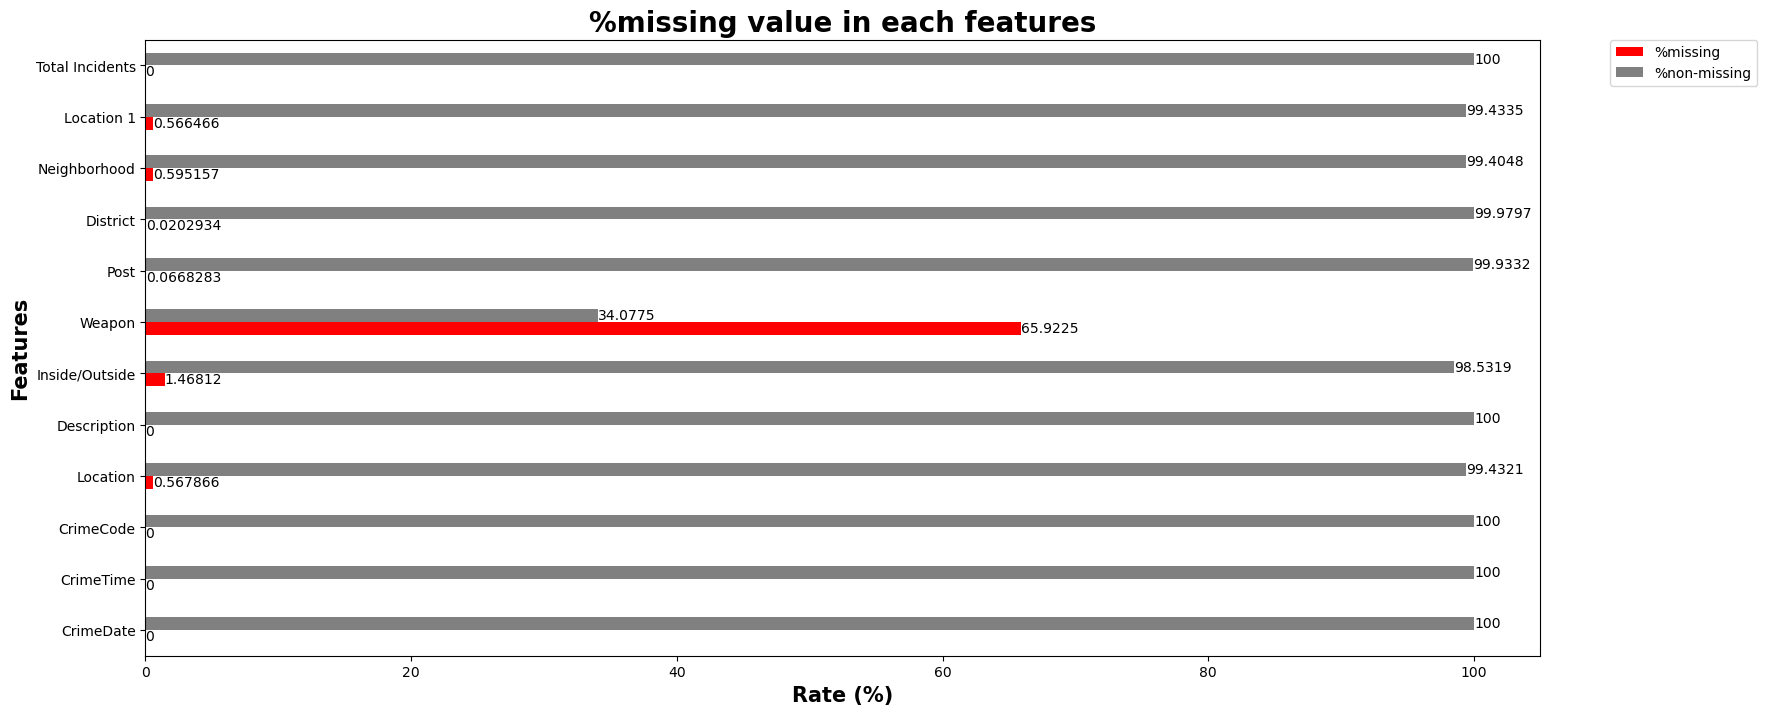

In [15]:
A4 = (8.3, 11.7)
hfigsize = (20,10)
vfigsize = (10,20)
def create_subplots(figsize, row = 1, col = 1):
    return plt.subplots(row, col, figsize = figsize)
fig, ax = create_subplots(figsize = (18,8))
missing_df[['%missing', '%non-missing']].plot.barh(ax = ax, align = 'center', color = ['red','grey'])
plt.ylabel('Features', fontsize = 15, fontweight = 'bold')
plt.xlabel('Rate (%)', fontsize = 15, fontweight = 'bold')
plt.title('%missing value in each features', fontsize = 20, fontweight = 'bold')
for bar in ax.containers:
    ax.bar_label(bar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### __Đánh giá__
+ Có thể thấy, có một vài trường dữ liệu bị thiếu giá trị, tuy nhiên con số là khá thấp chỉ có dưới 1.5%.<br>
+ Trường __Weapon__ có mức độ thiếu dữ liệu tận __66%__. Có thể các vụ phạm tội này, hung thủ không đem theo vụ khí, hoặc không tìm được vũ khí.

## __Các kiểu dữ liệu trong từng Features__

In [16]:
def opened_object_dtype(columns):
    return set(df[columns].apply(lambda x: type(x)))

In [17]:
info_features = {}
for column in df.columns:
    info_features[column] = {
        "datatype": opened_object_dtype(column),
        "unique": df[column].unique(),
        "number unique": df[column].nunique(),
        "percentage": dict(df[column].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
    }
info_features_df = pd.DataFrame(info_features)

In [18]:
info_features_df

CrimeDate  \
datatype       {<class 'pandas._libs.tslibs.timestamps.Timest...   
unique         [2016-11-12T00:00:00.000000000, 2016-11-11T00:...   
number unique                                               2143   
percentage     {2015-04-27 00:00:00: '0.1%', 2016-06-05 00:00...   

                                                       CrimeTime  \
datatype                                         {<class 'str'>}   
unique         [02:35:00, 02:56:00, 03:00:00, 03:45:00, 04:27...   
number unique                                               4236   
percentage     {'18:00:00': '2.5%', '17:00:00': '2.4%', '16:0...   

                                                       CrimeCode  \
datatype                                         {<class 'str'>}   
unique         [3B, 3CF, 6D, 6E, 4E, 3CO, 3BJ, 5A, 4B, 7A, 3A...   
number unique                                                 81   
percentage     {'4E': '16.8%', '6D': '13.7%', '5A': '9.6%', '...   

                                                        Location  \
datatype                        {<class 'str'>, <class 'float'>}   
unique         [300 SAINT PAUL PL, 800 S BROADWAY, 1500 PENTW...   
number unique                                              25949   
percentage     {'200 E PRATT ST': '0.2%', '300 LIGHT ST': '0....   

                                                     Description  \
datatype                                         {<class 'str'>}   
unique         [ROBBERY - STREET, ROBBERY - COMMERCIAL, LARCE...   
number unique                                                 15   
percentage     {'LARCENY': '21.9%', 'COMMON ASSAULT': '16.8%'...   

                                                  Inside/Outside  \
datatype                        {<class 'str'>, <class 'float'>}   
unique                              [O, I, Outside, Inside, nan]   
number unique                                                  4   
percentage     {'I': '50.4%', 'O': '48.1%', 'Outside': '1.3%'...   

                                                          Weapon  \
datatype                        {<class 'str'>, <class 'float'>}   
unique                       [nan, FIREARM, HANDS, OTHER, KNIFE]   
number unique                                                  4   
percentage     {'HANDS': '53.1%', 'FIREARM': '21.7%', 'OTHER'...   

                                                            Post  \
datatype                                       {<class 'float'>}   
unique         [111.0, 213.0, 413.0, 424.0, 423.0, 933.0, 223...   
number unique                                                189   
percentage     {111.0: '3.4%', 212.0: '1.7%', 922.0: '1.6%', ...   

                                                        District  \
datatype                        {<class 'str'>, <class 'float'>}   
unique         [CENTRAL, SOUTHEASTERN, NORTHEASTERN, SOUTHERN...   
number unique                                                 13   
percentage     {'NORTHEASTERN': '15.7%', 'SOUTHEASTERN': '13....   

                                                    Neighborhood  \
datatype                        {<class 'str'>, <class 'float'>}   
unique         [Downtown, Fells Point, Stonewood-Pentwood-Win...   
number unique                                                280   
percentage     {'Downtown': '3.4%', 'Frankford': '2.4%', 'Bel...   

                                                      Location 1  \
datatype                        {<class 'str'>, <class 'float'>}   
unique         [(39.2924100000, -76.6140800000), (39.28242000...   
number unique                                              97951   
percentage     {'(39.3180000000, -76.6582100000)': '0.2%', '(...   

               Total Incidents  
datatype       {<class 'int'>}  
unique                     [1]  
number unique                1  
percentage       {1: '100.0%'}

Sơ qua, ta có thể thấy rằng cột __Inside/Outside__ có các giá trị I = Inside, và O = Outside.

In [19]:
df['Inside/Outside'] = np.where(df['Inside/Outside'] == 'I', 'Inside', df['Inside/Outside'])
df['Inside/Outside'] = np.where(df['Inside/Outside'] == 'O', 'Outside', df['Inside/Outside'])

Cột __Location 1__ có thêm kiểu dữ liệu _'str'_.

In [20]:
location1 = df['Location 1']
float_value =[]
for value in location1.values:
    if isinstance(value, float):
        float_value.append(value)
print(set(float_value))

{nan}


Như vậy các giá trị tọa độ là các chuỗi __string__. Nếu để các tọa độ ở dạng kiểu dữ liệu  __string__ như thế sẽ rất khó để thực hiện các quá trình trực quan hóa dữ liệu một cách hiệu quả.

#### __Thay đổi kiểu dữ liệu bên trong cột `Inside/Outside`.__

In [21]:
def split_coordinate(coor):
    if(isinstance(coor, float)):
        return coor
    coor = coor.split(', ')
    coor[0] = float(coor[0][1:])
    coor[1] = float(coor[1][:-1])
    return list(coor)

df['Location 1'] = df['Location 1'].apply(lambda x: split_coordinate(x))
df = df.rename(columns = {'Location 1': 'Coordinate'})
df

CrimeDate CrimeTime CrimeCode            Location  \
0      2016-11-12  02:35:00        3B   300 SAINT PAUL PL   
1      2016-11-12  02:56:00       3CF      800 S BROADWAY   
2      2016-11-12  03:00:00        6D    1500 PENTWOOD RD   
3      2016-11-12  03:00:00        6D      6600 MILTON LN   
4      2016-11-12  03:00:00        6E  300 W BALTIMORE ST   
...           ...       ...       ...                 ...   
285802 2011-01-01  22:15:00        4D     6800 MCCLEAN BD   
285803 2011-01-01  22:30:00        6J    3000 ODONNELL ST   
285804 2011-01-01  23:00:00        7A      2500 ARUNAH AV   
285805 2011-01-01  23:25:00        4E     100 N MONROE ST   
285806 2011-01-01  23:38:00        4D    800 N FREMONT AV   

                 Description Inside/Outside   Weapon   Post      District  \
0           ROBBERY - STREET        Outside      NaN  111.0       CENTRAL   
1       ROBBERY - COMMERCIAL         Inside  FIREARM  213.0  SOUTHEASTERN   
2          LARCENY FROM AUTO        Outside      NaN  413.0  NORTHEASTERN   
3          LARCENY FROM AUTO        Outside      NaN  424.0  NORTHEASTERN   
4                    LARCENY        Outside      NaN  111.0       CENTRAL   
...                      ...            ...      ...    ...           ...   
285802          AGG. ASSAULT         Inside    HANDS  423.0  NORTHEASTERN   
285803               LARCENY         Inside      NaN  232.0  SOUTHEASTERN   
285804            AUTO THEFT        Outside      NaN  721.0       WESTERN   
285805        COMMON ASSAULT         Inside    HANDS  714.0       WESTERN   
285806          AGG. ASSAULT         Inside    HANDS  123.0       WESTERN   

                           Neighborhood             Coordinate  \
0                              Downtown  [39.29241, -76.61408]   
1                           Fells Point  [39.28242, -76.59288]   
2            Stonewood-Pentwood-Winston  [39.34805, -76.58834]   
3                             Westfield  [39.36263, -76.55161]   
4                              Downtown  [39.28938, -76.61971]   
...                                 ...                    ...   
285802                   Hamilton Hills  [39.37047, -76.56705]   
285803                           Canton  [39.28046, -76.57273]   
285804                   Evergreen Lawn  [39.29542, -76.65928]   
285805  Penrose/Fayette Street Outreach  [39.28999, -76.64707]   
285806                            Upton  [39.29812, -76.63391]   

        Total Incidents  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...                 ...  
285802                1  
285803                1  
285804                1  
285805                1  
285806                1  

[285807 rows x 12 columns]

Để dễ dàng quan sát các dữ liệu theo từng ngày, tháng, năm hơn, cần tạo thêm các cột từ dữ liệu có sẵn.

In [22]:
df[["Year", "Month", "Day"]] = df["CrimeDate"].apply(lambda x: str(x)).str.split("-", expand = True)
df['Day'] = df['Day'].apply(lambda x: x.split(' ')[0])

__Thông tin các cột__

<table>
    <tr>
        <th>STT</th>
        <th>Tên cột</th>
        <th>Ý nghĩa</th>
    </tr>
    <!-- <tr> -->
        <th>1</th>
        <th>CrimeDate</th>
        <th>Ngày phạm tội</th>
    </tr>
    <tr>
        <th>2</th>
        <th>CrimeTime</th>
        <th>Thời gian phạm tội</th>
    </tr>
    <tr>
        <th>3</th>
        <th>CrimeCode</th>
        <th>Mã phạm tội</th>
    </tr>
    <tr>
        <th>4</th>
        <th>Location</th>
        <th>Địa chỉ nơi phạm tội</th>
    </tr>
    <tr>
        <th>5</th>
        <th>Description</th>
        <th>Mô tả cách phạm tội</th>
    </tr>
    <tr>
        <th>6</th>
        <th>Inside/Outside</th>
        <th>Vụ phạm tội xảy ra ở trong nhà hay ngoài nhà</th>
    </tr>
    <tr>
        <th>7</th>
        <th>Weapon</th>
        <th>Hung khí sử dụng</th>
    </tr>
    <tr>
        <th>8</th>
        <th>Post</th>
        <th>Số tiền bồi thường</th>
    </tr>
    <tr>
        <th>9</th>
        <th>District</th>
        <th>Phía của thành phố Baltimore</th>
    </tr>
    <tr>
        <th>10</th>
        <th>Neighborhood</th>
        <th>Vị trí lân cận</th>
    </tr>
    <tr>
        <th>11</th>
        <th>Coordinate</th>
        <th>Tọa độ nơi xảy ra vụ phạm tội</th>
    </tr>
    <tr>
        <th>12</th>
        <th>Total Incidents</th>
        <th>Tổng số sự cố</th>
    </tr>   
</table>

## __Số lượng vụ phạm tội xảy ra trong từng năm__

Quan sát trong từng năm, kiểm tra số vụ phạm tội xảy ra

In [23]:
yearCrime_df = df['Year'].value_counts().to_frame(name = 'count')
yearCrime_df['Growth'] = yearCrime_df['count'].pct_change(periods=1)
yearCrime_df['Growth'].iloc[(0)] = 0
yearCrime_df

count    Growth
2011  50651  0.000000
2012  49561 -0.021520
2013  49542 -0.000383
2015  48806 -0.014856
2014  45958 -0.058353
2016  41289 -0.101593

In [24]:
barcolor = []
maxCount = yearCrime_df['count'].max()
minCount = yearCrime_df['count'].min()

for c in yearCrime_df['count'].values:
    if c == maxCount:
        barcolor.append('#CB4335')
    elif (c == minCount):
        barcolor.append('#73C6B6')
    else:
        barcolor.append('#BFC9CA')

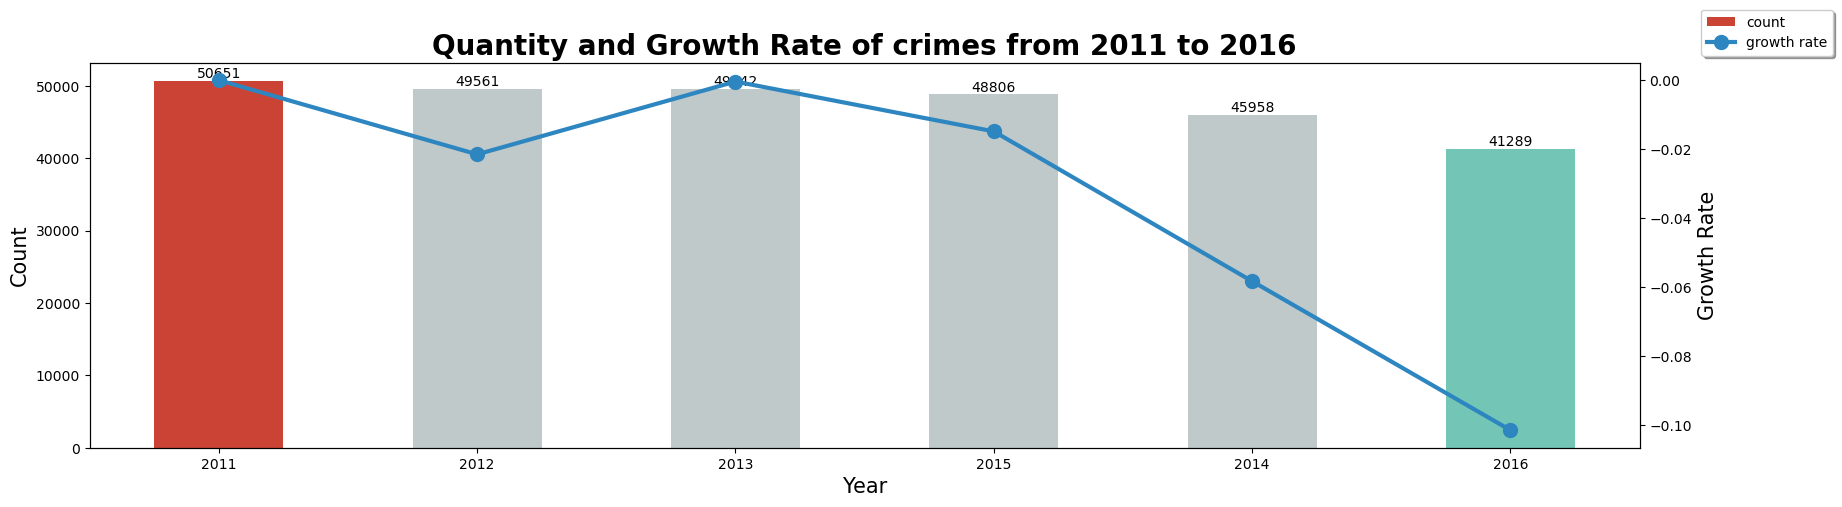

In [25]:
fig, ax = plt.subplots(figsize = (20,5))
bar = yearCrime_df['count'].plot.bar(ax = ax, rot = 0, color = barcolor)
ax2 = ax.twinx()
line = yearCrime_df['Growth'].plot.line(ax = ax2, color = '#2E86C1', linewidth = 3, marker = 'o', markersize = 10)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize =15)
ax2.set_ylabel('Growth Rate', fontsize =15)
fig.legend([bar, line], labels = ['count', 'growth rate'], bbox_to_anchor=(1, 1), shadow = True)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Quantity and Growth Rate of crimes from 2011 to 2016', fontsize = 20, fontweight = 'bold')
plt.show()

__Đánh giá__
+ Năm có nhiều vụ phạm tội nhất là vào năm __2011__, và thấp nhất vào năm __2016__.
+ Có thể nói các vụ phạm tội qua các năm có sự suy giảm, tuy không đáng kể, nhưng có thể nói đã có sự phát triển trong việc kiểm soát của chính quyền thành phố Baltimore.
+ Năm __2016__ cho thấy được mức độ giảm các vụ phạm tội là rõ rệt nhất với tỉ lệ giảm hơn 10% so với năm 2014

Các vụ phạm tội bên ngoài như thế nào với bên trong qua các năm

In [26]:
crime_df = df[['Year', 'Month', 'Day', 'Inside/Outside', 'District']]
crime_df

Year Month Day Inside/Outside      District
0       2016    11  12        Outside       CENTRAL
1       2016    11  12         Inside  SOUTHEASTERN
2       2016    11  12        Outside  NORTHEASTERN
3       2016    11  12        Outside  NORTHEASTERN
4       2016    11  12        Outside       CENTRAL
...      ...   ...  ..            ...           ...
285802  2011    01  01         Inside  NORTHEASTERN
285803  2011    01  01         Inside  SOUTHEASTERN
285804  2011    01  01        Outside       WESTERN
285805  2011    01  01         Inside       WESTERN
285806  2011    01  01         Inside       WESTERN

[285807 rows x 5 columns]

In [27]:
crime_df['Inside/Outside'].isna().sum()

4196

Để thuận lợi, ta loại bỏ các giá trị thiếu bên trong bảng crime_df để dễ dàng trực quan hóa.

In [28]:
crime_df.dropna(subset = ['Inside/Outside'], inplace =True)

In [29]:
crime_df

Year Month Day Inside/Outside      District
0       2016    11  12        Outside       CENTRAL
1       2016    11  12         Inside  SOUTHEASTERN
2       2016    11  12        Outside  NORTHEASTERN
3       2016    11  12        Outside  NORTHEASTERN
4       2016    11  12        Outside       CENTRAL
...      ...   ...  ..            ...           ...
285802  2011    01  01         Inside  NORTHEASTERN
285803  2011    01  01         Inside  SOUTHEASTERN
285804  2011    01  01        Outside       WESTERN
285805  2011    01  01         Inside       WESTERN
285806  2011    01  01         Inside       WESTERN

[281611 rows x 5 columns]

In [30]:
listYear = list(reversed(list(crime_df.Year.unique())))
print(listYear)
__year__ = widgets.Dropdown(
    options = listYear,
    value = min(listYear),
    description = 'Choose Year',
    disable  = False,
)

__side__ = widgets.Dropdown(
    options = ['All'] + list(crime_df['Inside/Outside'].unique()),
    value =  'All',
    description = 'Side',
)

def plotit(_year_, _side_):
    fig, ax = plt.subplots(1,1, figsize = (20,5))
    year_df = crime_df.loc[crime_df['Year'] == _year_]
    month_df = year_df.groupby(['Inside/Outside'])['Month'].value_counts().sort_index().to_frame(name = 'count').reset_index()
    
    net = month_df[month_df['Inside/Outside'] == 'Inside']['count'].values - month_df[month_df['Inside/Outside'] == 'Outside']['count'].values
    
    color = []
    if (_side_ == 'All'):
        color = ['darkred', 'salmon']
        line_df = pd.DataFrame(data = {'Net': net}, index = np.unique(df.Month.values, return_index=False))
    else:
        line_df = pd.DataFrame(data = {f'{ _side_} - Growth Rate': month_df[month_df['Inside/Outside'] == _side_]['count'].values}, index = np.unique(df.Month.values, return_index=False))[f'{ _side_} - Growth Rate'].pct_change(periods= 1)
        line_df[0] = 0
        if (_side_ == 'Inside'):
            color = ['darkred', 'grey']    
        else:
            color = ['grey', 'salmon']
    ax = sns.barplot(data = month_df,
                     x = 'Month',
                     y = 'count',
                     hue = 'Inside/Outside',
                     palette= color,)
    ax2 = ax.twinx()
    line_df.plot.line(linewidth = 3, marker = 'o', color = 'dodgerblue', ax = ax2, markersize = 8)
    ax.legend(bbox_to_anchor=(0.08, 1))
    ax2.legend(bbox_to_anchor=(1, 1))

['2011', '2012', '2013', '2014', '2015', '2016']


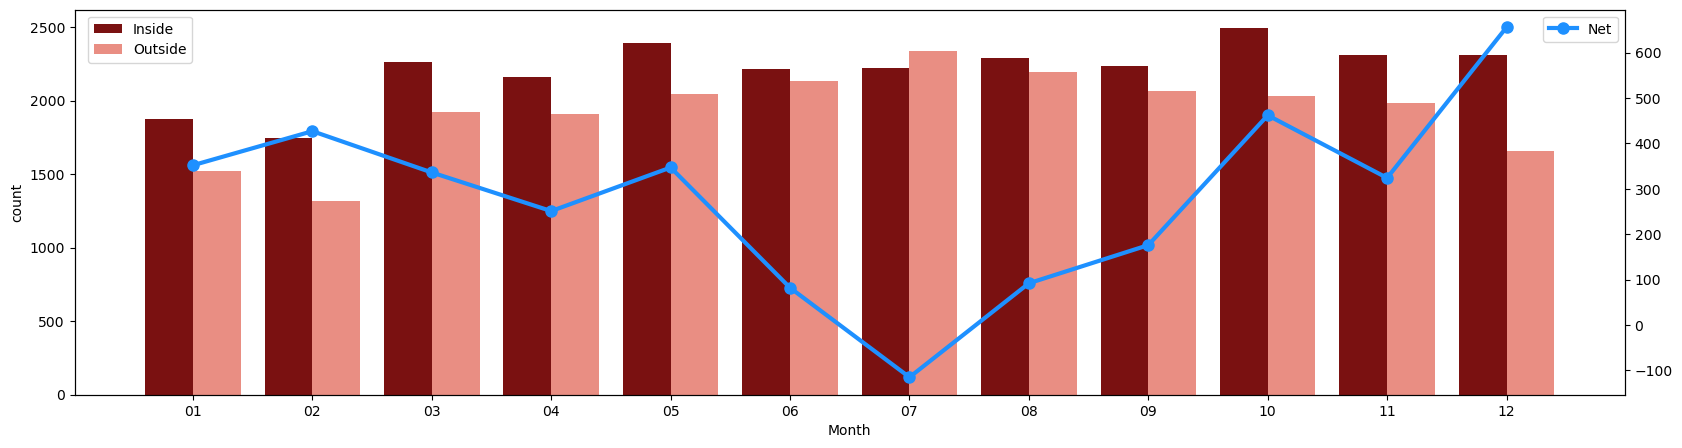

interactive(children=(Dropdown(description='Choose Year', options=('2011', '2012', '2013', '2014', '2015', '20…

In [31]:
interactive(plotit, _year_ = __year__, _side_ = __side__ )

## __Mức độ xảy ra tai nạn mỗi tuần.__

Khi quan sát dữ liệu `CrimeTime` ta có thể thấy có một vài dòng dữ liệu có format sai. Ta sẽ sửa lại cột này bằng cách chỉ lấy giờ chuẩn xảy xa phạm tội. Đồng thời gom tổng các vụ phạm tội theo thời gian xảy ra trong tuần vào dataframe mới là `Crime_Weekdays_df`.

In [32]:
df['Day of Week'] = df['CrimeDate'].astype('datetime64[ns]').dt.day_name()
df['CrimeTime'] = pd.to_datetime(df['CrimeTime'], format='%H', exact=False).astype(str).str[11:16]
df['Hour'] = df['CrimeTime'].astype('datetime64[ns]').dt.hour
WeekDays = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday','Monday']
Hours = np.arange(24)
gb = df.groupby(['Day of Week', 'Hour']).size()
Crime_Weekdays_df = pd.DataFrame(columns = WeekDays, index= Hours)
for col in WeekDays:
    Crime_Weekdays_df[col] = [x for x in gb[col]]
df = df.drop(columns= ['Day of Week','Hour'])
Crime_Weekdays_df.head()

Sunday  Saturday  Friday  Thursday  Wednesday  Tuesday  Monday
0    2103      2174    1744      1613       1510     1616    1740
1    2308      2200    1644      1515       1409     1458    1520
2    1955      1833     999       927        927      903    1037
3    1281      1147     734       687        712      684     716
4     850       851     584       528        499      488     574

Trực quan hóa từ `Crime_Weekdays_df`.

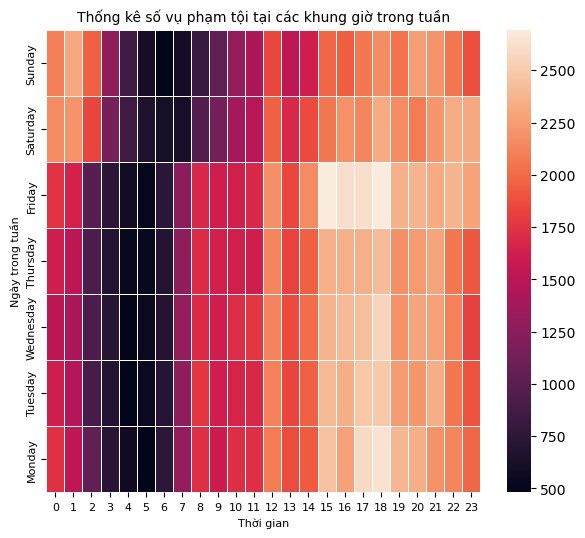

In [33]:
ax = plt.axes()
sns.heatmap(Crime_Weekdays_df.T, linewidth=.5, ax=ax)
ax.set_title('Thống kê số vụ phạm tội tại các khung giờ trong tuần')
ax.set_ylabel('Ngày trong tuần')
ax.set_xlabel('Thời gian')
ax.title.set_fontsize(10)
plt.setp(ax.get_xticklabels(), rotation= 0, fontsize = 8)
plt.setp(ax.get_yticklabels(), rotation= 90, fontsize = 8)
ax.xaxis.label.set_fontsize(8)
ax.yaxis.label.set_fontsize(8)
ax.figure.set_figheight(6)
ax.figure.set_figwidth(7)
plt.show()

Như đồ thị `heat-map` ở trên, ta có thể thấy:
- Khung giờ hoạt động phổ biến nhất của tội phạm là từ 14h - 23h các ngày từ thứ hai đến thứ 6.
- Riêng các ngày cuối tuần, các hoạt động phạm tội còn diễn ra vào rạng sáng từ 0h đến 3h.
- Quan sát kỹ thêm vào biểu đồ, vào 12h các ngày trong tuần cũng xảy ra khá nhiều tội phạm.
- Giải thích cho điều này, các khung giờ trên là khung giờ đặc biệt trong tuần khi có đông đúc người. Nó là cơ sở tốt khi tội phạm có khả năng hoạt động tốt nhất lúc đông người. Ngoài ra, vào giờ khuya của các ngày nghỉ, số lượng phạm tội cũng thay đổi bởi thời điểm này là thời điểm mà lực lượng công an ít hoạt động cũng như người dân đi khuya ít được bảo vệ tốt nhất.

## __Xu hướng phạm tội tại mỗi tháng và thay đổi trong số tiền bồi thường qua các năm.__

In [34]:
gb_total = df.groupby(['Year', 'Month']).size()
gb_post = df.groupby(['Year', 'Month'])['Post'].mean()
gb_post.unstack(level='Month')

Month          01          02          03          04          05          06  \
Year                                                                            
2011   516.437791  491.202059  512.134521  501.345709  507.258636  494.734583   
2012   522.919750  509.646603  500.932791  501.214034  506.738111  485.752037   
2013   504.505777  498.336250  495.255021  491.283672  509.347572  493.926824   
2014   505.479332  505.547215  518.615340  510.991747  510.933029  499.669489   
2015   505.555893  499.374340  510.436980  502.958739  503.867890  508.361774   
2016   512.957181  505.128656  504.845867  499.696412  511.712453  519.561870   

Month          07          08          09          10          11          12  
Year                                                                           
2011   500.688732  499.526350  494.025360  500.939061  503.873214  507.641013  
2012   479.188123  487.935977  495.002377  500.837793  503.270561  502.797318  
2013   494.805183  499.452716  521.687678  508.817629  511.671630  511.498678  
2014   504.658717  504.471159  526.605360  502.540252  508.183887  501.985107  
2015   500.783596  503.604400  495.621043  499.167103  494.710831  512.660213  
2016   517.059833  518.336852  506.136374  508.123581  500.092646         NaN

Có vẻ như dữ liệu năm 2016 chưa được hoàn thiện khi tháng 11 số lượng phạm tội có chênh lệch rất lớn so với các tháng còn lại cũng như chưa có cập nhật nào cho tháng 12. Ta sẽ thực hiện loại bỏ các tháng cuối năm này để có thể rút ra nhận xét từng tháng của mỗi năm từ đó đưa ra phương hướng dự đoán tốt nhất có số liệu bị thiếu này.

In [35]:
Crime_Months_df = gb_total.unstack(level='Month').T
Crime_Post_df = gb_post.unstack(level= 'Month').T
for year in Crime_Months_df.columns:
    Crime_Months_df.loc[Crime_Months_df[year] <= 2000 , year] = np.nan

Crime_Months_df

Year     2011    2012    2013    2014    2015    2016
Month                                                
01     3440.0  3838.0  3809.0  3653.0  3623.0  3384.0
02     3108.0  3358.0  3200.0  2891.0  2650.0  2873.0
03     4269.0  4302.0  3635.0  3442.0  3365.0  3618.0
04     4149.0  3979.0  3987.0  3756.0  3908.0  3847.0
05     4516.0  4648.0  4449.0  4166.0  4434.0  4225.0
06     4427.0  4296.0  4415.0  4016.0  4656.0  4406.0
07     4669.0  4412.0  4477.0  4196.0  4776.0  4087.0
08     4574.0  4514.0  4621.0  4126.0  4654.0  4225.0
09     4377.0  4207.0  4222.0  4071.0  4408.0  4430.0
10     4644.0  4224.0  4606.0  4211.0  4215.0  4670.0
11     4411.0  3903.0  3962.0  3737.0  4073.0     NaN
12     4067.0  3880.0  4159.0  3693.0  4044.0     NaN

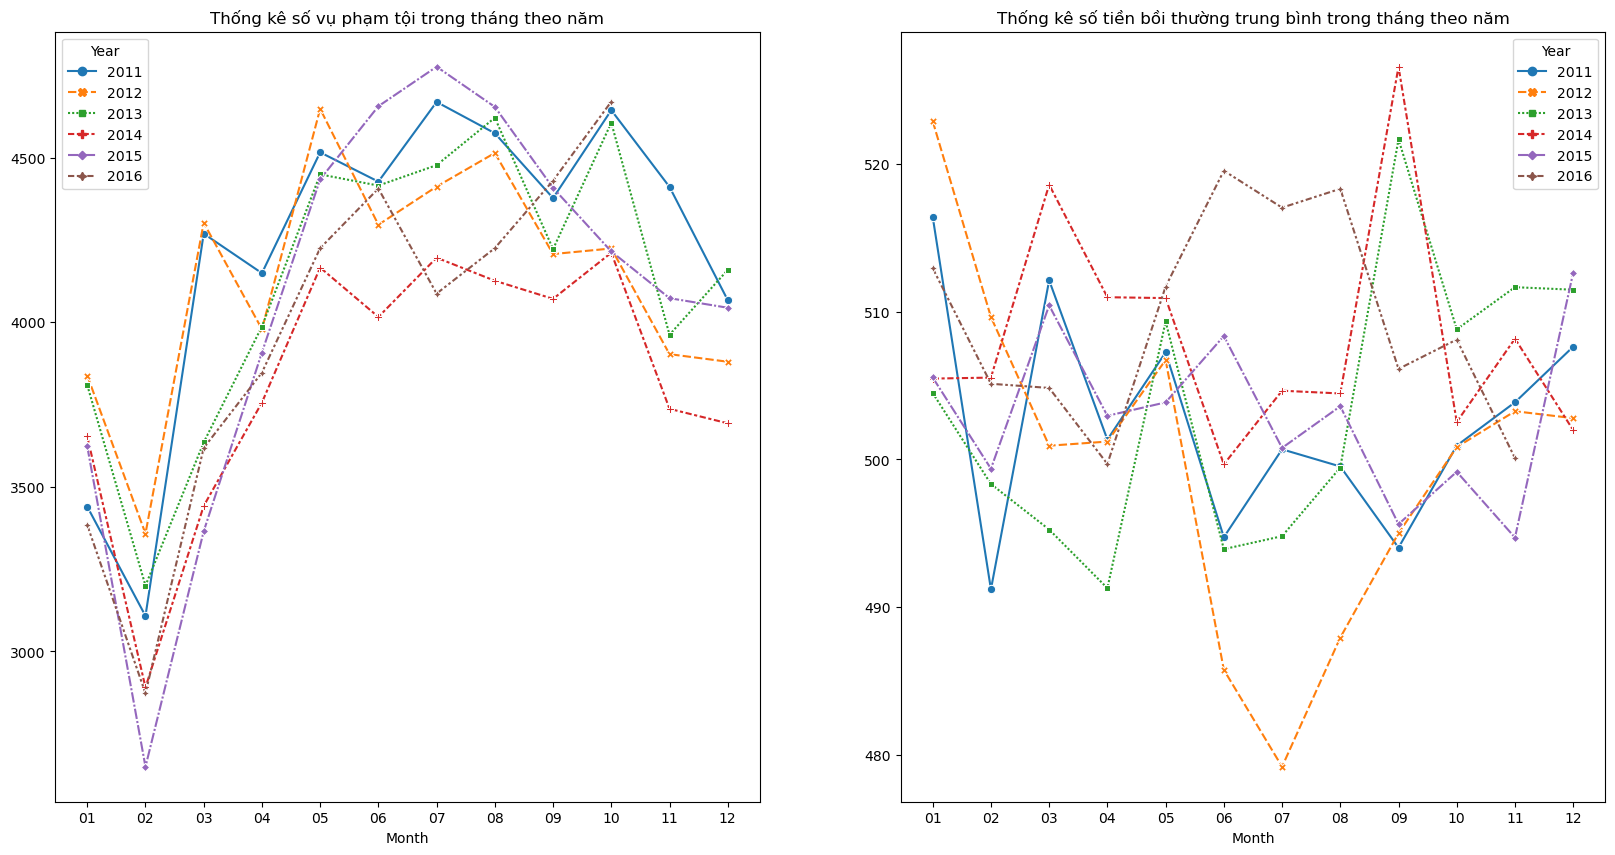

In [36]:
fig, ax = plt.subplots(1, 2 , figsize = (20, 10))
sns.lineplot(data = Crime_Months_df, ax = ax[0], markers= True)
sns.lineplot(data = Crime_Post_df, ax = ax[1], markers= True)
ax[0].set_title('Thống kê số vụ phạm tội trong tháng theo năm')
ax[1].set_title('Thống kê số tiền bồi thường trung bình trong tháng theo năm')
plt.show()

__Đánh giá:__
- **Theo biểu đồ bên trái:**
    - Ta thấy tháng 2 rất đặc biệt so với những tháng còn lại khi tại tháng này, số lượng tội phạm năm nào cũng ít hẳn so với các tháng khác.
    - Từ tháng 5 đến tháng 10, các vụ phạm tội nhìn chung tăng và giảm dần vào các tháng cuối năm. Đặc biệt tình hình tội phạm tăng cao lại vào tháng 7 và tháng 10.
    - So với năm 2014 khi mà số vụ phạm tội thấp nhất thì một năm sau đó, tức 2015, tội phạm lại hoạt động nhiều hơn hẳn, đỉnh điểm tháng 7/2015 vượt trội hơn so với những năm trong quá khứ.
    - Năm 2016 đặc biệt hơn so với các năm khác khi tháng 7 lại đột ngột giảm mạnh và tăng trở lại vào tháng 10.
- **Từ những nhận định trên, ta quan sát biểu đồ bên phải vào các tháng đặc biệt là tháng 7 và tháng 10:**
    - Tháng 7 có nhiều tội phạm nhưng nhìn chung số tiền bồi thường không quá chênh lệch nhau qua các năm, riêng có năm 2012, số tiền trung bình thụt sâu chứng tỏ số vụ phạm tội nhiều nhưng không quá nghiêm trọng.
    - Ngược lại vào tháng 10, năm 2014 được nhận định có ít tội phạm nhất so với các năm, nhưng số tiền xử phạt lại cao hơn hẳn, chứng tỏ năm 2014 có số vụ phạm tội nặng nhiều.
- ***Qua 2 biểu đồ, dựa vào biểu đồ 1 ta có thể phần nào dự đoán được phần nào tình hình cuối năm của 2016 khi nhìn chung cuối mỗi năm đều có chiều hướng đi xuống so với tháng trước. Nhưng dự đoán về mức phạt trung bình có vẻ khó hơn khi biến động mỗi năm là khác nhau.***

## __Xu hướng của các nhóm tội phạm diễn ra trong từng năm như nào?__

Đầu tiên, ta sẽ thử quan sát tỉ lệ chung của các nhóm tội phạm qua các năm

In [37]:
ques1_cols = ['Description', 'Post', 'Weapon', 'Year']
ques1_df = df[ques1_cols]
ques1_df.insert(0, 'ID', range(0, 0 + len(ques1_df)))
ques1_df

ID           Description   Post   Weapon  Year
0            0      ROBBERY - STREET  111.0      NaN  2016
1            1  ROBBERY - COMMERCIAL  213.0  FIREARM  2016
2            2     LARCENY FROM AUTO  413.0      NaN  2016
3            3     LARCENY FROM AUTO  424.0      NaN  2016
4            4               LARCENY  111.0      NaN  2016
...        ...                   ...    ...      ...   ...
285802  285802          AGG. ASSAULT  423.0    HANDS  2011
285803  285803               LARCENY  232.0      NaN  2011
285804  285804            AUTO THEFT  721.0      NaN  2011
285805  285805        COMMON ASSAULT  714.0    HANDS  2011
285806  285806          AGG. ASSAULT  123.0    HANDS  2011

[285807 rows x 5 columns]

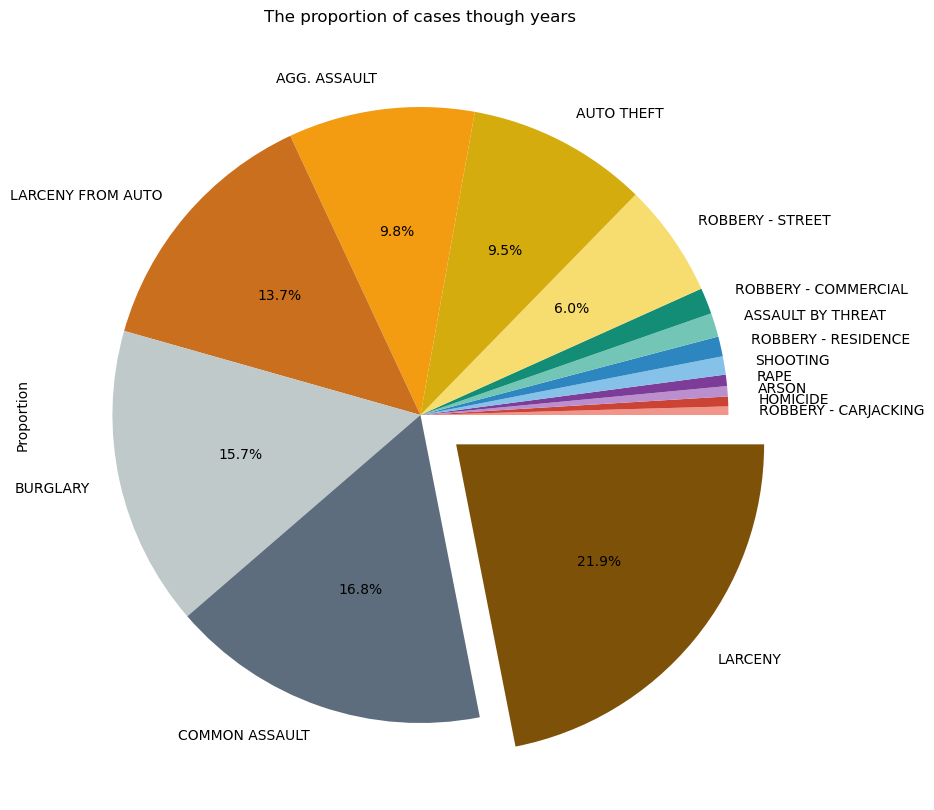

In [38]:
pie1_df = ques1_df.groupby(['Description'])['ID'].count().sort_values(ascending=True)

colors = ['#F1948A', '#CB4335', '#BB8FCE', '#7D3C98', '#85C1E9', '#2E86C1', '#73C6B6', '#138D75', '#F7DC6F', '#D4AC0D', '#F39C12', '#CA6F1E', '#BFC9CA', '#5D6D7E', '#7E5109']

fig, ax = plt.subplots(figsize=(10, 10))

autopct = lambda x: f'{x:.1f}%' if x > 5 else None
pie1_df.plot.pie(y = pie1_df.index,
           shadow = False,
           colors = colors, 
           explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.15 ),  
           autopct = autopct,
           ax = ax)

ax.set_title('The proportion of cases though years')
ax.set_ylabel('Proportion')
plt.show()

__Đánh giá:__
- Qua biểu đồ pie trên, có thể thấy nhóm `LARCENY` (trộm cắp) chiếm tỉ lệ cao nhất qua các năm.
- Tiếp đến là các nhóm như `COMMON ASSAULT, BURGLARY, LARCENY, AGG. ASSAULT, AUTO THEFT, ROBBERY - STREET`
- Những nhóm còn lại có tỉ lệ dưới 5% không đáng kể

Vậy xu hướng của các nhóm tội phạm này diễn ra như nào qua các năm? Và số lượng của chúng như thế nào?

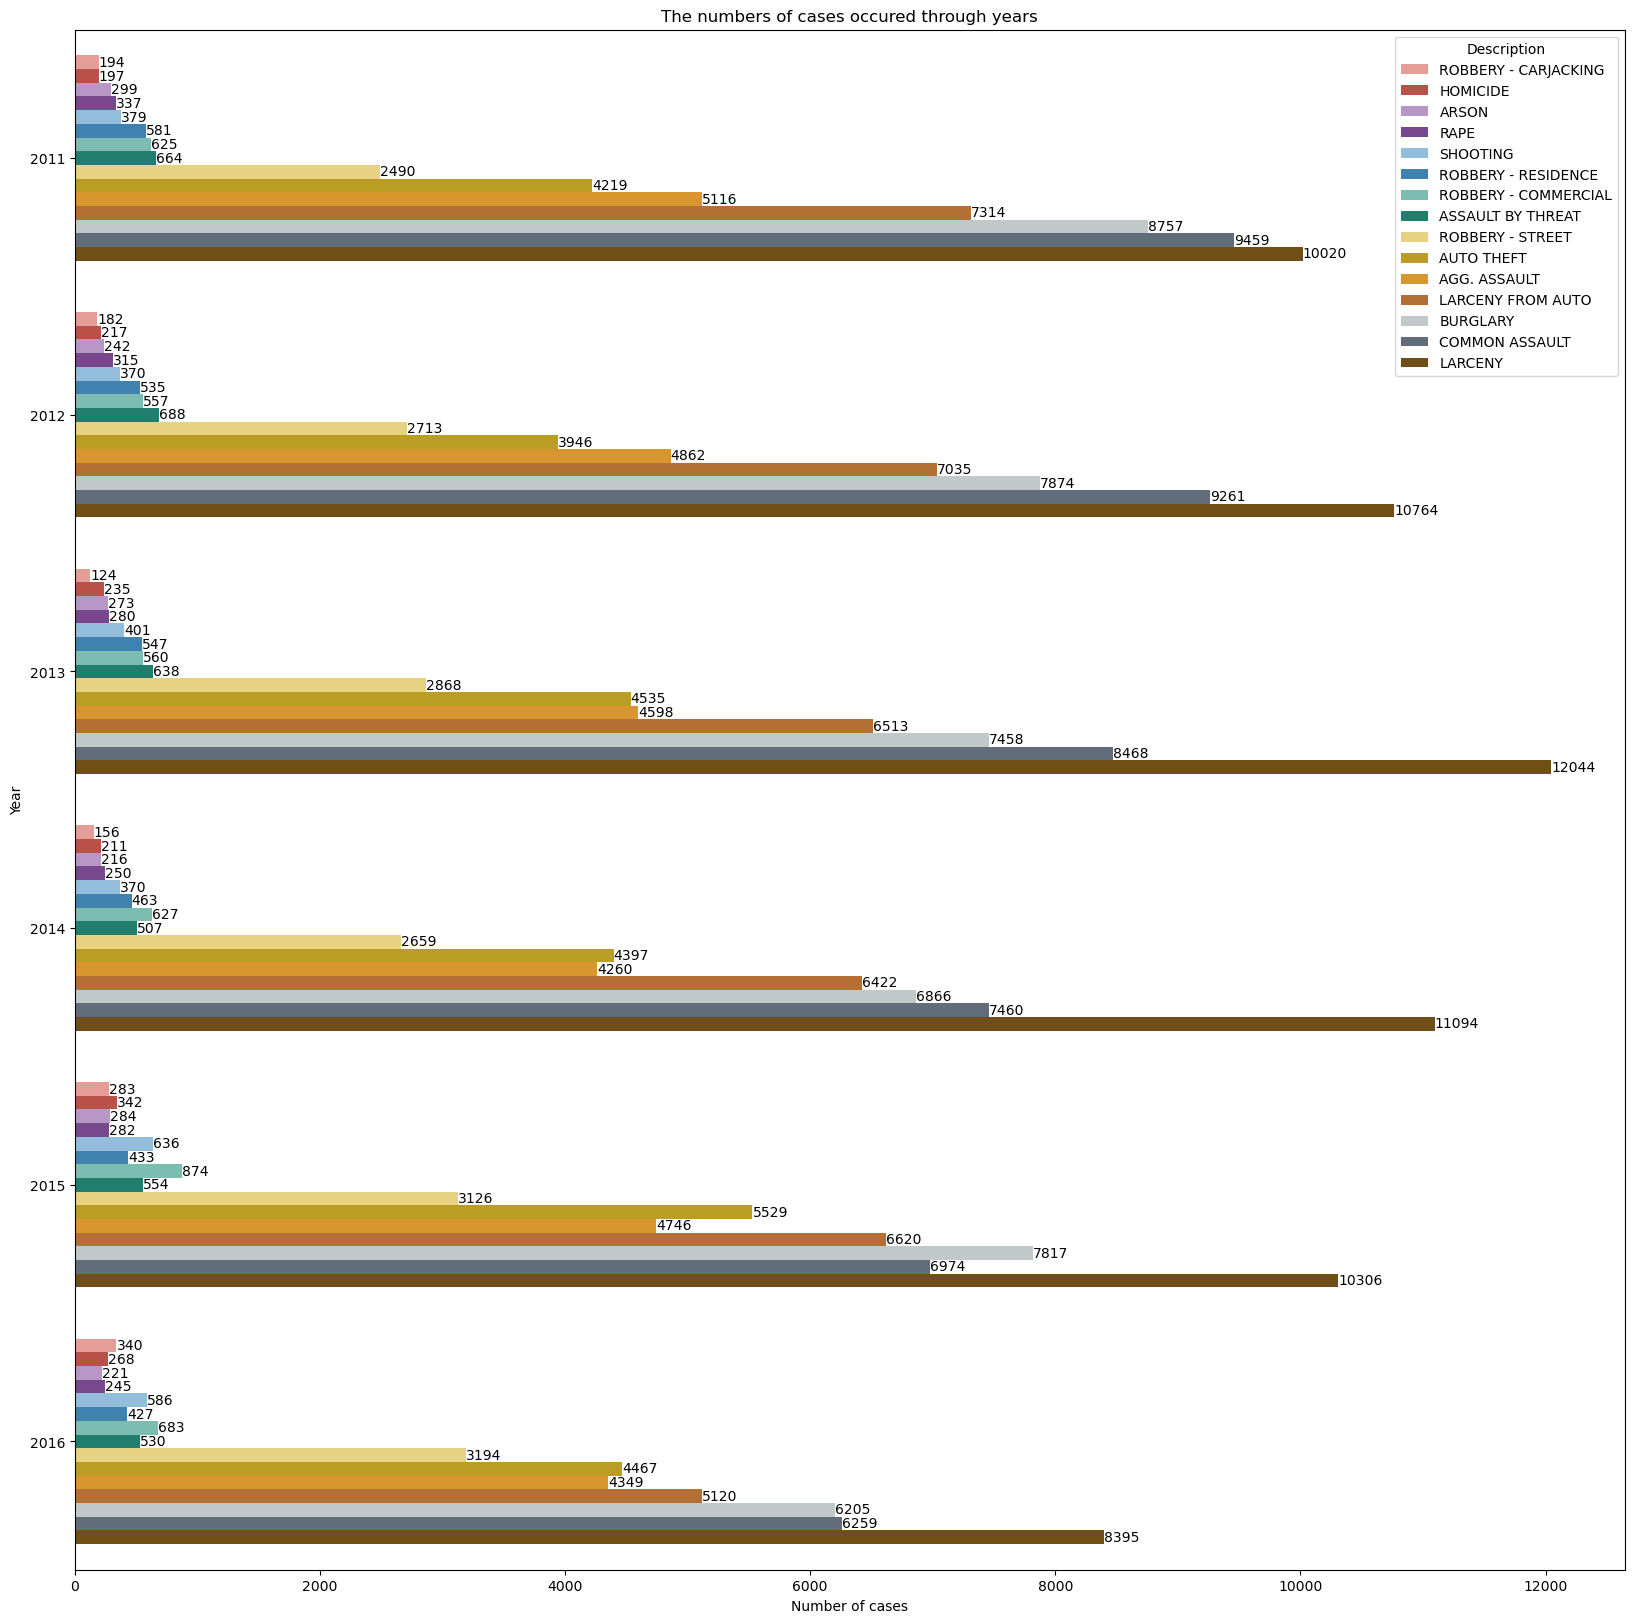

In [39]:
line1_df = ques1_df.groupby(['Year', 'Description'])['ID'].nunique().reset_index()
line1_df = line1_df.rename({'ID': 'Quantity'}, axis = 1)
line1_df = line1_df.sort_values(['Year', 'Quantity'], ascending = True)
line1_df['Growth'] = line1_df['Quantity'].pct_change(periods=1)
line1_df['Growth'].iloc[(0)] = 0
# line1_df

colors = ['#F1948A', '#CB4335', '#BB8FCE', '#7D3C98', '#85C1E9', '#2E86C1', '#73C6B6', '#138D75', '#F7DC6F', '#D4AC0D', '#F39C12', '#CA6F1E', '#BFC9CA', '#5D6D7E', '#7E5109']

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (20, 20))

sns.barplot(data = line1_df, 
                y = 'Year', 
                x = 'Quantity', 
                hue = 'Description',
                palette = colors,
                orient = 'h')

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title('The numbers of cases occured through years')
ax.set_xlabel('Number of cases')
plt.show()

__Đánh giá:__
- Nhìn chung, số lượng tội phạm giảm đáng kể so từ năm 2016 với năm 2011 (gần 20%). Tuy nhiên vào năm 2013, tỉ lệ tội phạm vọt lên gần bằng với số vụ ở năm 2011, và sau đó mới giảm đều lại.
- Nhìn kỹ vào xu hướng các tội phạm, hầu như các tội phạm có xu hướng giảm qua 1 chuỗi thời gian (tưy nhiên có sự biến thiên đa dạng ở các nhóm). Chỉ có nhóm `LARCENY` lại tăng dần và mạnh nhất vào năm 2013 và nhóm có tỉ lệ nhỏ `ROBBERY - STREET` lại tăng dần so từ năm 2011 đến năm 2016 (có thể dự kiến tăng trong tương lai).
- Còn các nhóm dưới 5%, ta thấy vẫn không có sự đột biến (dù có sự biến thiên tăng dần nhỏ, giảm dần nhỏ) nào qua các năm cả.

## __Liệu số tiền bồi thường có tỉ lệ thuận với số ca của các vụ tội phạm?__

Ta sẽ quan sát tổng số tiền bồi thường qua các năm và số tiền bồi thường của từng nhóm tội phạm qua các năm

In [40]:
ques1_cols = ['Post', 'Description', 'Year', 'ID']

treemap1_df = ques1_df[ques1_cols]
treemap1_df = treemap1_df.groupby(['Description', 'Year'])['Post'].sum()
treemap1_df = treemap1_df.to_frame().reset_index().rename(columns = {'Post': 'Post sum'})

fig = px.treemap(treemap1_df, 
                    path = ['Year', 'Description'], 
                    values = treemap1_df['Post sum'],
                    color = treemap1_df['Post sum'])
fig.update_layout(margin = dict(t = 75, l = 50, r = 50, b = 50))
fig.show()

In [41]:
ques1_cols = ['Post', 'Description', 'Year', 'ID']
line1_df = ques1_df[ques1_cols]

listDes = line1_df['Description'].unique().tolist()
def plotit(_des_):
    line_plotit = line1_df.loc[line1_df['Description'] == _des_]
    line1 = line_plotit.groupby('Year')['ID'].count()
    line2 = line_plotit.groupby('Year')['Post'].sum()

    fig, axes = plt.subplots(ncols = 2, nrows = 1 , figsize = (15, 5))
    sns.lineplot(data = line1, ax = axes[0])
    sns.lineplot(data = line2, ax = axes[1])
    axes[0].set_title(f'The numbers of cases of {_des_} through years')
    axes[1].set_title(f'The sum of post {_des_} through years')
        

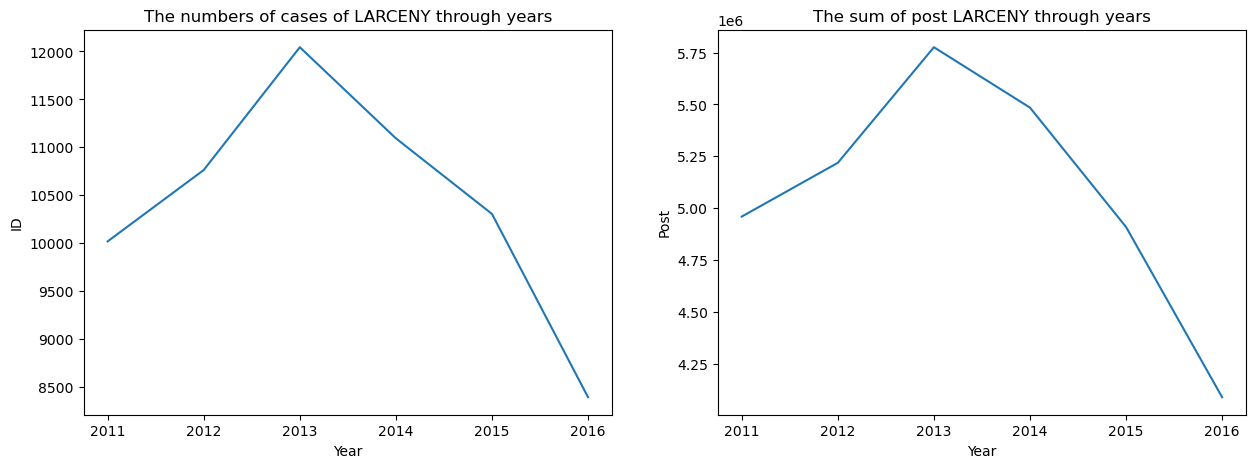

In [42]:
# ['ROBBERY - STREET', 'ROBBERY - COMMERCIAL', 'LARCENY FROM AUTO',
#        'LARCENY', 'COMMON ASSAULT', 'ROBBERY - CARJACKING', 'BURGLARY',
#        'AGG. ASSAULT', 'AUTO THEFT', 'ASSAULT BY THREAT', 'SHOOTING',
#        'HOMICIDE', 'ROBBERY - RESIDENCE', 'RAPE', 'ARSON']
plotit('LARCENY')

__Đánh giá:__
- __Biểu đồ Heat map:__
    + Qua biểu đồ heatmap, ta có thể thấy xu hướng của số tiền bồi thường cũng như tỉ lệ số lượng của các nhóm tội phạm.
    + Cụ thể thể hiện rõ `LARCENY` vẫn đứng đầu so với các nhóm còn lại, và sự xếp hạng của các nhóm trên 5% vẫn rõ ràng tương ứng với tỉ lệ số lượng các vụ tội phạm, tương tự với các nhóm dưới 5%.
- __Biểu đồ line:__
    + Qua biểu đồ line thể hiện xu hướng về các vụ tội phạm lẫn tổng số tiền bồi thường qua các năm, ta thử xem với đối tượng `LARCENY` thì biểu đồ có xu thế hầu như là giống nhau.
    + Thử xem với thêm nhiều đối tượng khác thì thấy rõ ràng biểu đồ có chiều hướng vẫn không đổi. Vậy ta có thể đánh giá rằng nếu giảm đi số vụ triệt để thêm qua từng năm thì số tiền bồi thường sẽ giảm đi đáng kể.

## __Sự ảnh hưởng của vũ khí đến với tiền bồi thường__

Text(0.5, 0, 'Weapon')

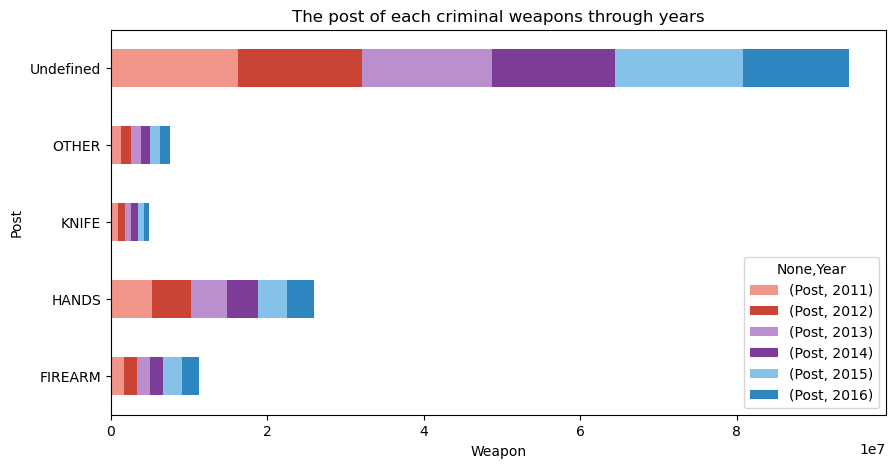

In [43]:
ques1_cols = ['Post', 'Description', 'Year', 'Weapon']
sbar1_df = df[ques1_cols]
sbar1_df.insert(0, 'ID', range(0, 0 + len(sbar1_df)))

sbar1_df['Weapon'] = sbar1_df['Weapon'].replace(np.nan, 'Undefined')

line1_df = ques1_df.groupby(['Year', 'Description'])['ID'].nunique().reset_index()
line1_df = line1_df.rename({'ID': 'Quantity'}, axis = 1)

sbar1_df = sbar1_df.groupby(['Weapon', 'Year'])['Post'].sum()
sbar1_df = sbar1_df.to_frame().rename({'Posts': 'Post sum'}).sort_values(by = 'Year').unstack(level= 1)
colors = ['#F1948A', '#CB4335', '#BB8FCE', '#7D3C98', '#85C1E9', '#2E86C1']

fig, ax = plt.subplots(figsize = (10, 5))

sbar1_df.plot(kind = "barh", stacked = True, ax = ax, color = colors)
ax.set_title('The post of each criminal weapons through years')
ax.set_ylabel('Post')
ax.set_xlabel('Weapon')


## __Sự phân bố các loại tội phạm theo vị trí__

### __Import package__

In [44]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
from ipywidgets import widgets, interactive

In [45]:
map_df = df[['Location', 'Coordinate', 'Year', 'Description']]
# map_df = map_df.loc[map_df['Year'] == '2011']
map_df['Longitude'] = map_df['Coordinate'].str[1]
map_df['Latitude'] = map_df['Coordinate'].str[0]

listYear = map_df['Year'].unique().tolist()
listYear.reverse()
listDes = map_df['Description'].unique().tolist()

geometry = [Point(xy) for xy in zip(map_df['Longitude'], map_df['Latitude'])]
map_df = GeoDataFrame(map_df, geometry = geometry)

In [46]:
__year__ = widgets.Dropdown(
    options = listYear,
    value = min(listYear),
    description = 'Choose Year',
    disable = False,
)

__description__ = widgets.Dropdown(
    options = ['All'] + listDes,
    value =  'All',
    description = 'choose Description',
    disable = False
)

def plotit(_year_, _des_):
    if _des_ == 'All':
        map_plotit = map_df.loc[map_df['Year'] == _year_]
        
    else:
        map_plotit = map_df.loc[(map_df['Year'] == _year_) & (map_df['Description'] == _des_)]

    fig = px.scatter_mapbox(map_plotit, 
                                lon = 'Longitude', 
                                lat = 'Latitude', 
                                hover_name = 'Location', 
                                color = 'Description',
                                zoom = 3,)
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()
    
    

interactive(plotit, _year_ = __year__, _des_ = __description__ )

interactive(children=(Dropdown(description='Choose Year', options=('2011', '2012', '2013', '2014', '2015', '20…

## **Tỉ lệ các loại vũ khí được sử dụng trong các vụ phạm tội theo từng năm như thế nào?**

In [47]:
df.head()

CrimeDate CrimeTime CrimeCode            Location           Description  \
0 2016-11-12     02:00        3B   300 SAINT PAUL PL      ROBBERY - STREET   
1 2016-11-12     02:00       3CF      800 S BROADWAY  ROBBERY - COMMERCIAL   
2 2016-11-12     03:00        6D    1500 PENTWOOD RD     LARCENY FROM AUTO   
3 2016-11-12     03:00        6D      6600 MILTON LN     LARCENY FROM AUTO   
4 2016-11-12     03:00        6E  300 W BALTIMORE ST               LARCENY   

  Inside/Outside   Weapon   Post      District                Neighborhood  \
0        Outside      NaN  111.0       CENTRAL                    Downtown   
1         Inside  FIREARM  213.0  SOUTHEASTERN                 Fells Point   
2        Outside      NaN  413.0  NORTHEASTERN  Stonewood-Pentwood-Winston   
3        Outside      NaN  424.0  NORTHEASTERN                   Westfield   
4        Outside      NaN  111.0       CENTRAL                    Downtown   

              Coordinate  Total Incidents  Year Month Day  
0  [39.29241, -76.61408]                1  2016    11  12  
1  [39.28242, -76.59288]                1  2016    11  12  
2  [39.34805, -76.58834]                1  2016    11  12  
3  [39.36263, -76.55161]                1  2016    11  12  
4  [39.28938, -76.61971]                1  2016    11  12

Kiểm tra ngày xảy ra các vụ tội phạm có liên tục hay không, liệu có ngày nào không có vụ phạm tội hay không có dữ liệu?
- Viết hàm checkContinuous() để kiểm tra dữ liệu có liên tục hay không. 
    + Đầu tiên, ta sắp xếp dữ liệu từ nhỏ đến lớn bằng hàm sort_values().
    + Sau đó, loại bỏ các các ngày trùng nhau bằng hàm unique().
    + Cuối cùng, dùng hàm diff() để tính hiệu của 2 ngày liền kề và chuyển sang đơn vị thời gian timedelta = 1 ngày.

In [48]:
def checkContinuous(col):
    date_diff = np.diff(col.sort_values().unique()).astype('timedelta64[D]')
    if np.all(date_diff == np.timedelta64(1, 'D')):
        print('Dates are continuous.')
    else:
        print('Dates are not continuous.')
    return np.all(date_diff == np.timedelta64(1, 'D'))

# def findMissingDates(col):
#     date_range = pd.date_range(start=col.min(), end=col.max())
#     missing_dates = set(date_range) - set(col)
#     return missing_dates

checkContinuous(df['CrimeDate'])

Dates are continuous.


True

=> Không có ngày nào bị thiếu dữ liệu, mỗi ngày đều có vụ phạm tội xảy ra. Như vậy ta có thể dùng `lineplot` để biểu diễn dữ liệu theo `CrimeDate`.

In [49]:
min_date = df['CrimeDate'].min()
max_date = df['CrimeDate'].max()
print(f'Min crime date is {min_date}')
print(f'Max crime date is {max_date}')

Min crime date is 2011-01-01 00:00:00
Max crime date is 2016-11-12 00:00:00


Có thể thấy rằng tháng 11/2016 chỉ có dữ liệu đến ngày 12, vậy ta sẽ không sử dụng các dữ liệu này để trực quan vì sẽ không thể hiện được chính xác các vụ phạm tội và tỉ lệ các loại vũ khí được sử dụng trong tháng này.

Đầu tiên, ta sẽ tạo dataframe <font color=red>data</font> để chứa các dữ liệu sẽ trực quan hoá.
- Lọc dữ liệu của tháng 11/2016 ra khỏi `df`.
- Groupby các vụ phạm tội theo `CrimeDate` để đếm số lượng các vũ khí được sử dụng theo từng loại.
- Tạo dataframe `crime_count` để đếm số lượng các vụ phạm tội theo từng tháng của mỗi năm.

In [50]:
new_df = df[df['CrimeDate']  < '2016-11-01 00:00:00']
data = new_df.groupby('CrimeDate').agg({'Weapon': 'value_counts'}).rename(columns={'Weapon': 'WeaponCount'}).reset_index()
crime_count = new_df.groupby(new_df['CrimeDate'].dt.to_period('M')).agg('size').to_frame().rename(columns={0: 'CrimeCount'}).reset_index()

- Đổi `CrimeDate` thành dạng tháng/năm để dễ dàng quan sát.
- Groupby các vụ phạm tội theo `CrimeDate`, `WeaponType` và `CrimeCount`.
- Merge 2 dataframe `data` và `crime_count` để có thể biểu diễn dữ liệu theo từng tháng của mỗi năm.

In [51]:
data.rename(columns={'Weapon': 'WeaponType'}, inplace=True)
data['CrimeDate'] = data['CrimeDate'].dt.to_period('M')
data = data.merge(crime_count, on='CrimeDate')
data = data.groupby(['CrimeDate', 'WeaponType', 'CrimeCount']).agg({'WeaponCount': 'sum'}).reset_index()
crime_count = data.groupby('CrimeDate')['CrimeCount'].first()
data = data.pivot('CrimeDate', 'WeaponType', 'WeaponCount')

Trực quan hoá dữ liệu đã tính lên lineplot để có thể quan sát được sự thay đổi của các loại vũ khí được sử dụng trong các vụ phạm tội qua các năm.
- Kết hợp biểu diễn thêm các giá trị min của số vụ phạm tội trong mỗi năm để quan sát tính chu kì của dữ liệu.

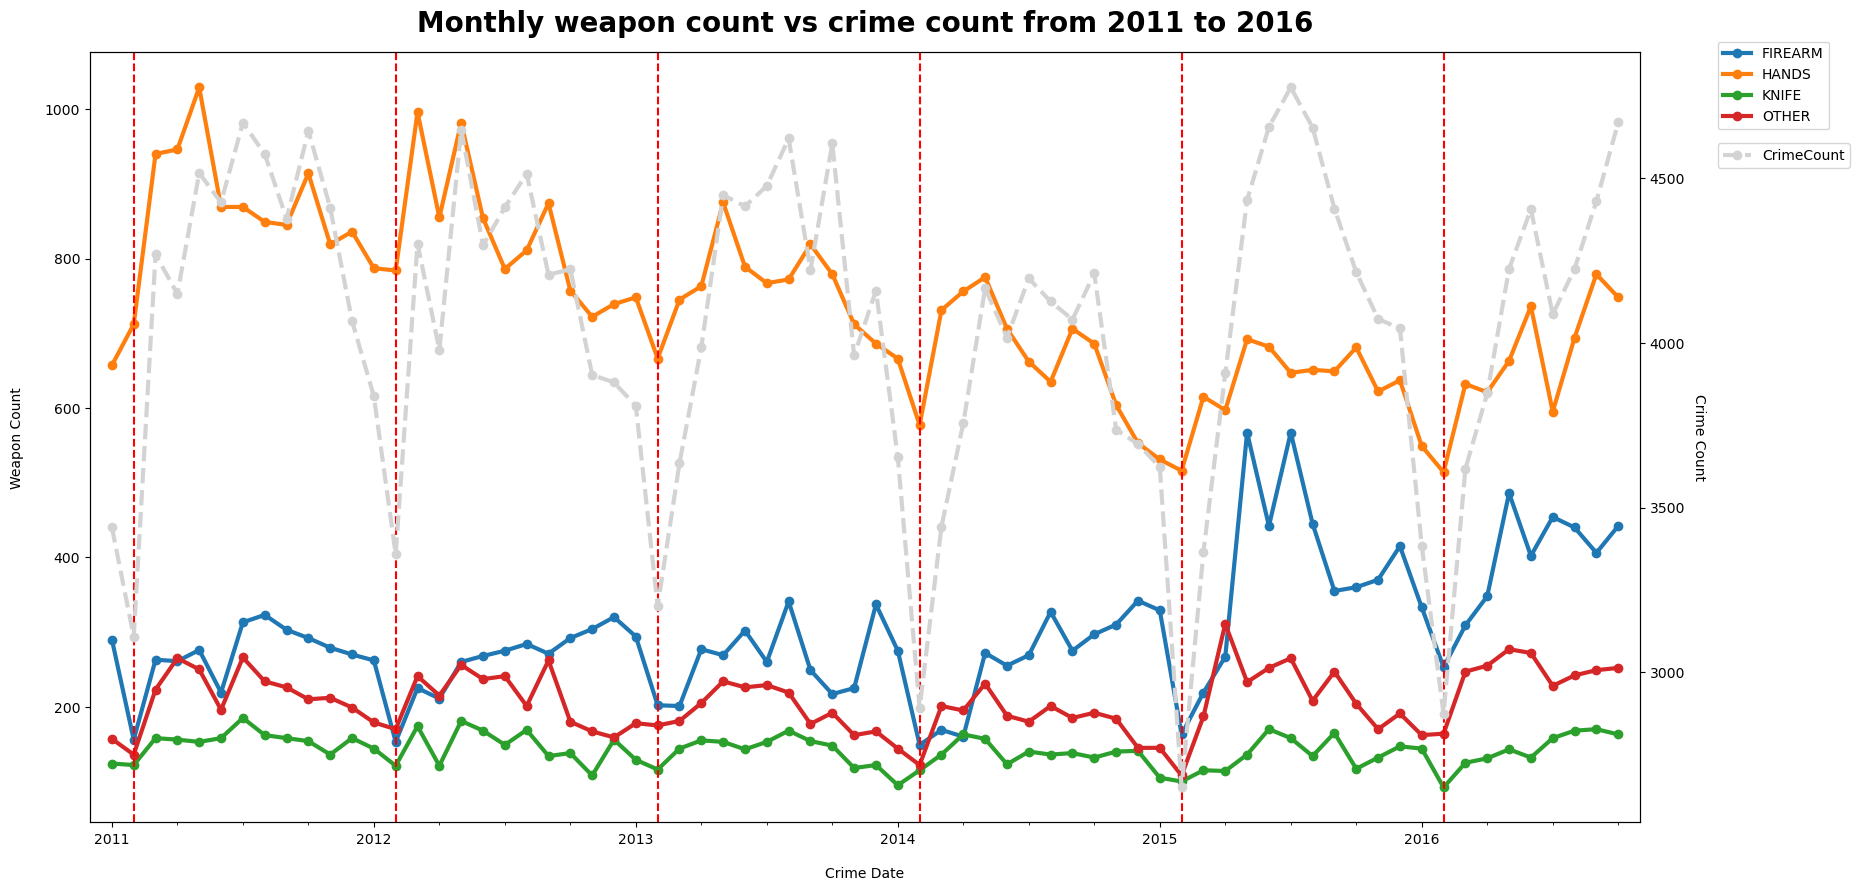

0    2011-02
1    2012-02
2    2013-02
3    2014-02
4    2015-02
5    2016-02
Name: CrimeCount, dtype: period[M]

In [52]:
# data['CrimeCount'] = crime_count 

fig, ax = plt.subplots(figsize=(20,10))
data.plot(kind='line', linewidth=3, marker='o', ax=ax)
ax2 = ax.twinx()
crime_count.plot(kind='line', linewidth=3, marker='o', linestyle='--', color='lightgrey', ax=ax2)
# ax.ayhline(10, color='red', linestyle='--')
xmin, xmax = ax.get_xlim()
ax.set_xlim(xmin-1, xmax+1)
ax.legend(loc=[1.05, 0.9])
ax.set_ylabel('Weapon Count', rotation=90, labelpad=15)
ax2.set_ylabel('Crime Count', rotation=270, labelpad=15)
ax.set_xlabel('Crime Date', labelpad=15)
ax2.legend(loc=[1.05, 0.85])
ax.set_title('Monthly weapon count vs crime count from 2011 to 2016', fontsize=20, fontweight='bold', pad=15)

# years = data.index.year.unique()
# for year in years:
#     ax.axvline(f'{year}-02', color='red', linestyle='--')
min_index = crime_count.groupby(crime_count.index.year).agg('idxmin').to_frame().reset_index()['CrimeCount']
for i in min_index:
    ax.axvline(i, color='red', linestyle='--')
plt.show()
min_index

__Đánh giá__
- Qua biểu đồ, ta có thể thấy số vụ phạm tội có tính chu kì qua mỗi năm. Cụ thể, ở tháng 2 mỗi năm thì số vụ phạm tội là ít nhất, kéo theo đó, số lượng vũ khí sử dụng cũng giảm theo. Theo như em tìm hiểu thì tháng 2 tại Baltimore có thời tiết rất khắc nghiệt, là tháng có nhiệt độ thấp nhất trong năm. Nhiệt độ trung bình vào ban ngày là khoảng 7 độ C (45 độ F) và vào ban đêm là khoảng -2 độ C (28 độ F). Tháng 2 cũng là tháng có lượng mưa và tuyết cao nhất trong năm tại Baltimore, với lượng mưa trung bình khoảng 78 mm (3,07 inch) và lượng tuyết trung bình khoảng 20 cm (7,9 inch). Vì thế, một nguyên nhân mà số vụ phạm tội giảm mạnh vào tháng 2 có thể là do thời tiết khắc nghiệt, người dân ít ra đường hơn nên ít xảy ra các vụ phạm tội.
- Các vụ phạm tội có xu hướng tăng vào các tháng đầu năm và giảm ở các tháng cuối năm, tuy nhiên vào năm 2016 thì số vụ phạm tội lại tăng vào tháng 7, 8, 9, 10. 

***

## **Phân tích các thành phần của chuỗi thời gian và dự đoán các giá trị**

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Đếm số lượng các vụ phạm tội theo từng tháng của mỗi năm:

In [54]:
crime_count = df[df['CrimeDate']  < '2016-11-01 00:00:00'].groupby(df['CrimeDate'].dt.to_period('M')).agg('size').to_frame().rename(columns={0: 'CrimeCount'})
crime_count.index = crime_count.index.to_timestamp()
crime_count

CrimeCount
CrimeDate             
2011-01-01        3440
2011-02-01        3108
2011-03-01        4269
2011-04-01        4149
2011-05-01        4516
...                ...
2016-06-01        4406
2016-07-01        4087
2016-08-01        4225
2016-09-01        4430
2016-10-01        4670

[70 rows x 1 columns]

**Chuỗi thời gian thường có 4 thành phần chính**:
- Thành phần xu thế (trend) - T: thể hiện đà tăng hay giảm của chuỗi thời gian trong tương lai.
- Thành phần mùa vụ (seasonality) - S: thể hiện cho sự lặp lại của chuỗi thời gian theo chu kì.
- Thành phần chu kì (cyclical) - C
- Thành phần ngẫu nhiên (random) - R hay error

Ta sẽ sử dụng 2 phương pháp để phân tích thành phần của chuỗi thời gian:
- Phương pháp phân tích chuỗi thời gian theo mô hình nhân 
- Phương pháp phân tích chuỗi thời gian theo mô hình cộng

#### **Multiplicative Decomposition: Mô hình nhân**
$$Y_t = T_t × S_t × C_t × R_t$$

Text(0.5, 1.0, 'Multiplicative Decompose')

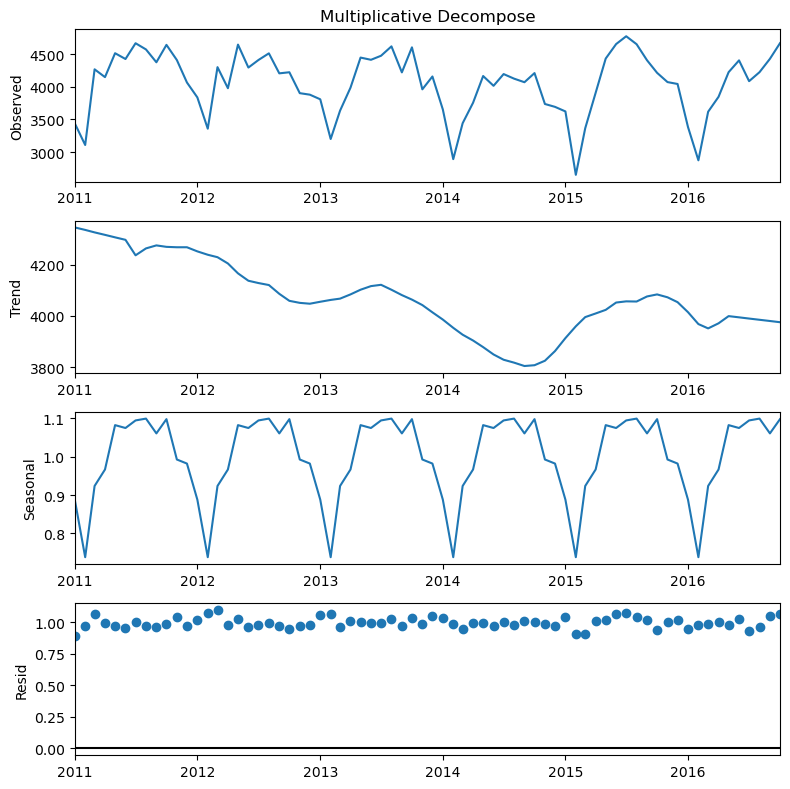

In [55]:
mul_model = seasonal_decompose(crime_count['CrimeCount'], model='multiplicative', extrapolate_trend='freq')

plt.rcParams.update({'figure.figsize': (8,8)})
fig = mul_model.plot()
fig.axes[0].set_ylabel('Observed')
fig.axes[0].set_title('Multiplicative Decompose')

#### **Additive Decomposition: Mô hình cộng**
$$Y_t = T_t + S_t + C_t + R_t$$

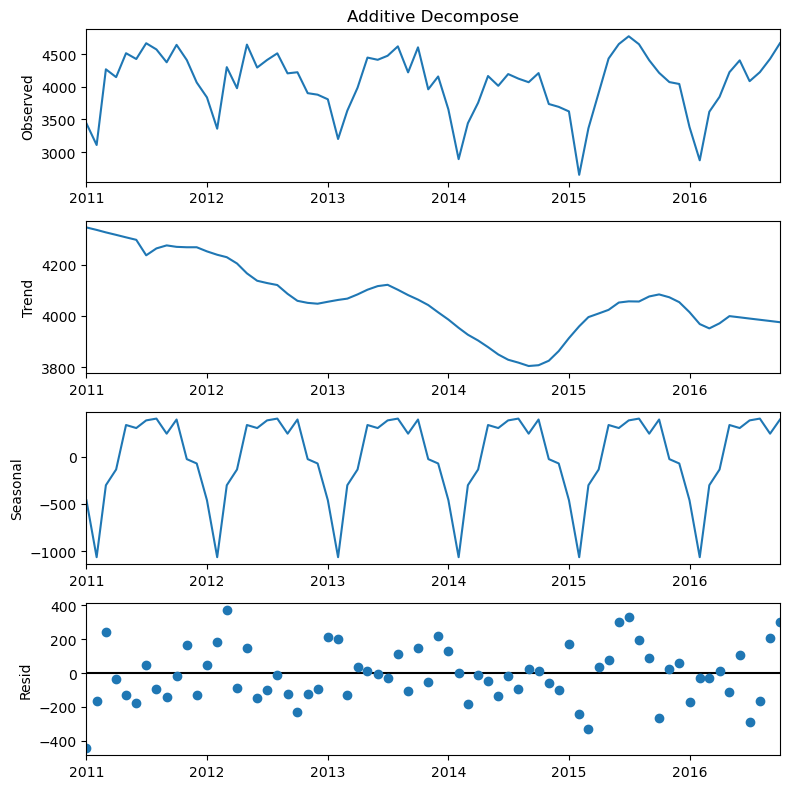

In [56]:
add_model = seasonal_decompose(crime_count['CrimeCount'], model='additive', extrapolate_trend='freq')

fig2 = add_model.plot()
fig2.axes[0].set_ylabel('Observed')
fig2.axes[0].set_title('Additive Decompose')
plt.show()

Qua 2 phương pháp phân tích thành phần, ta thấy được rằng chuỗi có tính mùa vụ với chu kì là 1 năm, bắt đầu từ tháng 2 năm này đến tháng 2 năm sau.

**Tự tương quan (ACF - Autocorrelation Function)**
- Các giá trị trong chuỗi thời gian hầu như có sự tương quan với giá trị trễ của nó, các giá trị càng gần nhau thì tương quan càng mạnh hoặc các giá trị cùng thuộc 1 chu kì thường sẽ có tương quan cao (cùng tháng trong chu kì năm hoặc cùng quí trong chu kì năm).
- Hệ số tự tương quan thường được dùng để tìm ra độ trễ của quá trình trung bình trượt MV(q) và kiểm tra các yếu tố mùa vụ.  

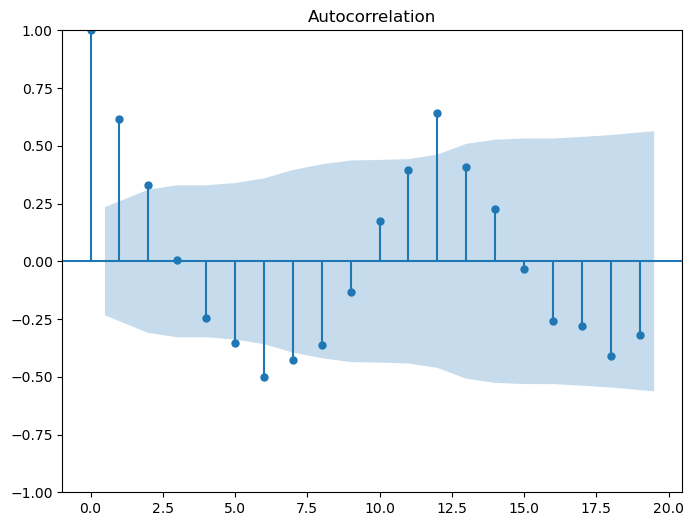

In [57]:
plt.rcParams.update({'figure.figsize': (8,6)})
ax1 = plot_acf(crime_count)

Trục x là độ trễ, trục y là giá trị của hệ số tương quan ứng với độ trễ đó. Phần màu xanh là khoảng tin cậy 95% để giá trị hệ số tự tương quan bằng 0. Ta nên chọn giá trị q là giá trị đầu tiên mà hệ số tương quan nằm ngoài khoảng tin cậy này. Vậy ta sẽ chọn q = 1.

**Tự tươnq quan riêng phần (PACF - Partial Autocorrelation Function)**
- Về cơ bản hệ số này cũng giống như hệ số tự tương quan, tuy nhiên vẫn có sự khác biệt, đó là hệ số tương quan này bỏ qua ảnh hưởng của các chuỗi độ trễ trung gian (các chuỗi trễ $x_{t-1}, ..., x_{t-k+1}$ nằm giữa $x_t$ và $x_{t-k}$).
- PACF có tác dụng tìm ra hệ số bậc tự do p của quá trình tự hồi quy **AR**(p). Tương tự như ACF, ta sẽ tìm được giá trị p thông qua đồ thị PACF, đó chính là vị trí mà giá trị của hệ số tương quan riêng phần nằm ngoài ngưỡng tin cậy 95%.

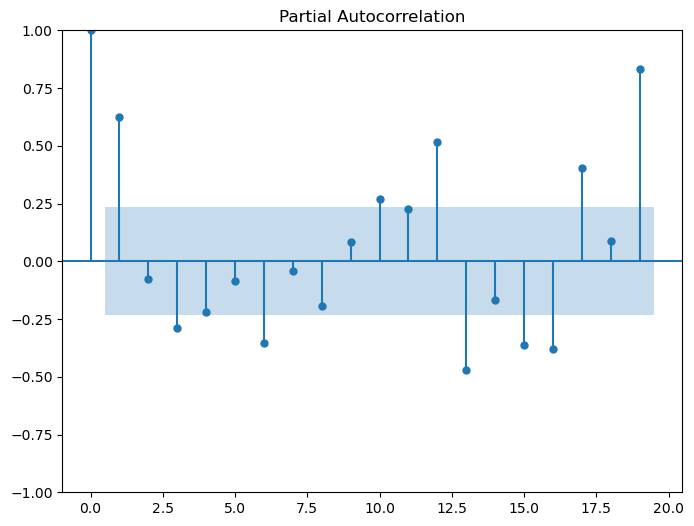

In [58]:
plot_pacf(crime_count);

Quan sát biểu đồ, ta sẽ chọn được giá trị p = 1.

#### **Mô hình ARIMA**
Dựa trên giả thuyết chuỗi dừng và phương sai không đổi. Mô hình sử dụng kết hợp hai đầu vào chính là những tín hiệu quá khứ của chuỗi được dự báo để dự báo nó. Các tín hiệu bao gồm: chuỗi tự hồi qui AR(auto regression) và chuỗi trung bình trượt MA(moving average).   

Áp dụng mô hình **ARIMA** với các tham số p = 1, d = 1, q = 1.

In [59]:
# fig, ax = plt.subplots(figsize=(20,10))
# crime_count.plot(kind='line', linewidth=3, marker='o', linestyle='--', color='grey', ax=ax)
model = ARIMA(crime_count, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             CrimeCount   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -511.726
Date:                Mon, 15 May 2023   AIC                           1029.452
Time:                        23:03:02   BIC                           1036.154
Sample:                    01-01-2011   HQIC                          1032.111
                         - 10-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9852      0.036    -27.165      0.000      -1.056      -0.914
ma.L1          0.9561      0.071     13.436      0.000       0.817       1.096
sigma2      1.622e+05   3.17e+04      5.111      0.0

Dựa vào bảng kết quả từ mô hình **ARIMA**, ta có thể thấy được các thông số của mô hình:

- **coef** là giá trị hệ số ước lượng từ mô hình tương ứng với các biến.
- **std err** là độ lệch chuẩn của hệ số ước lượng.
- **P>|z|** là giá trị P-value, giá trị P-value < 0.05 sẽ cho thấy hệ số ước lượng lớn hơn 95% là có ý nghĩa thống kê.
- **No. Observations** là số lượng quan sát (số lượng mẫu dữ liệu).
- **Log Likelihood**: Gía trị hàm logarit ước lượng hợp lý tối đa.
- **AIC**: Chỉ số Akaike Information Criteria, chỉ số này ước lượng lượng thông tin bị mất đi bởi một mô hình (do dự báo sai), mô hình càng mất ít thông tin thì có chất lượng càng cao. Do đó **AIC** càng nhỏ thì mô hình càng tốt.
- **BIC**: Chỉ số Bayesian Information Criteria. 

### **Mô hình SARIMA**
Bản chất là mô hình **ARIMA** nhưng được điều chỉnh để áp dụng cho các chuỗi thời gian có yếu tố mùa vụ. Bằng cách tìm ra các chu kì của mùa vụ và loại bỏ nó khỏi chuỗi ta sẽ có thể hồi quy mô hình theo phương pháp **ARIMA**.

Phân chia tập train/test, các giá trị trước năm 2016 là tập train và các giá trị của năm 2016 là tập test.

In [60]:
train = crime_count[crime_count.index < '2016-01-01']
test = crime_count[crime_count.index >= '2016-01-01']
train.shape, test.shape

((60, 1), (10, 1))

Trực quan Partial Autocorrelation và Autocorrelation để xác định các giá trị p, q.

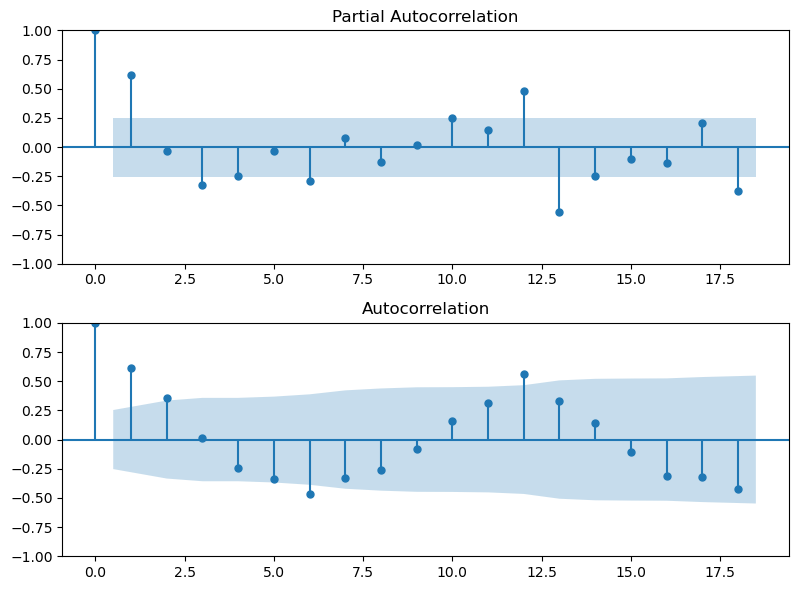

In [61]:
plt.rcParams.update({'figure.figsize': (8,6)})
fig, ax = plt.subplots(2)
plot_pacf(train, ax=ax[0]);
plot_acf(train, ax=ax[1]);
fig.tight_layout()

c:\Users\Admin\miniconda3\envs\lab01\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Text(0.5, 1.0, 'SARIMA predict for numbers of crime in 2016')

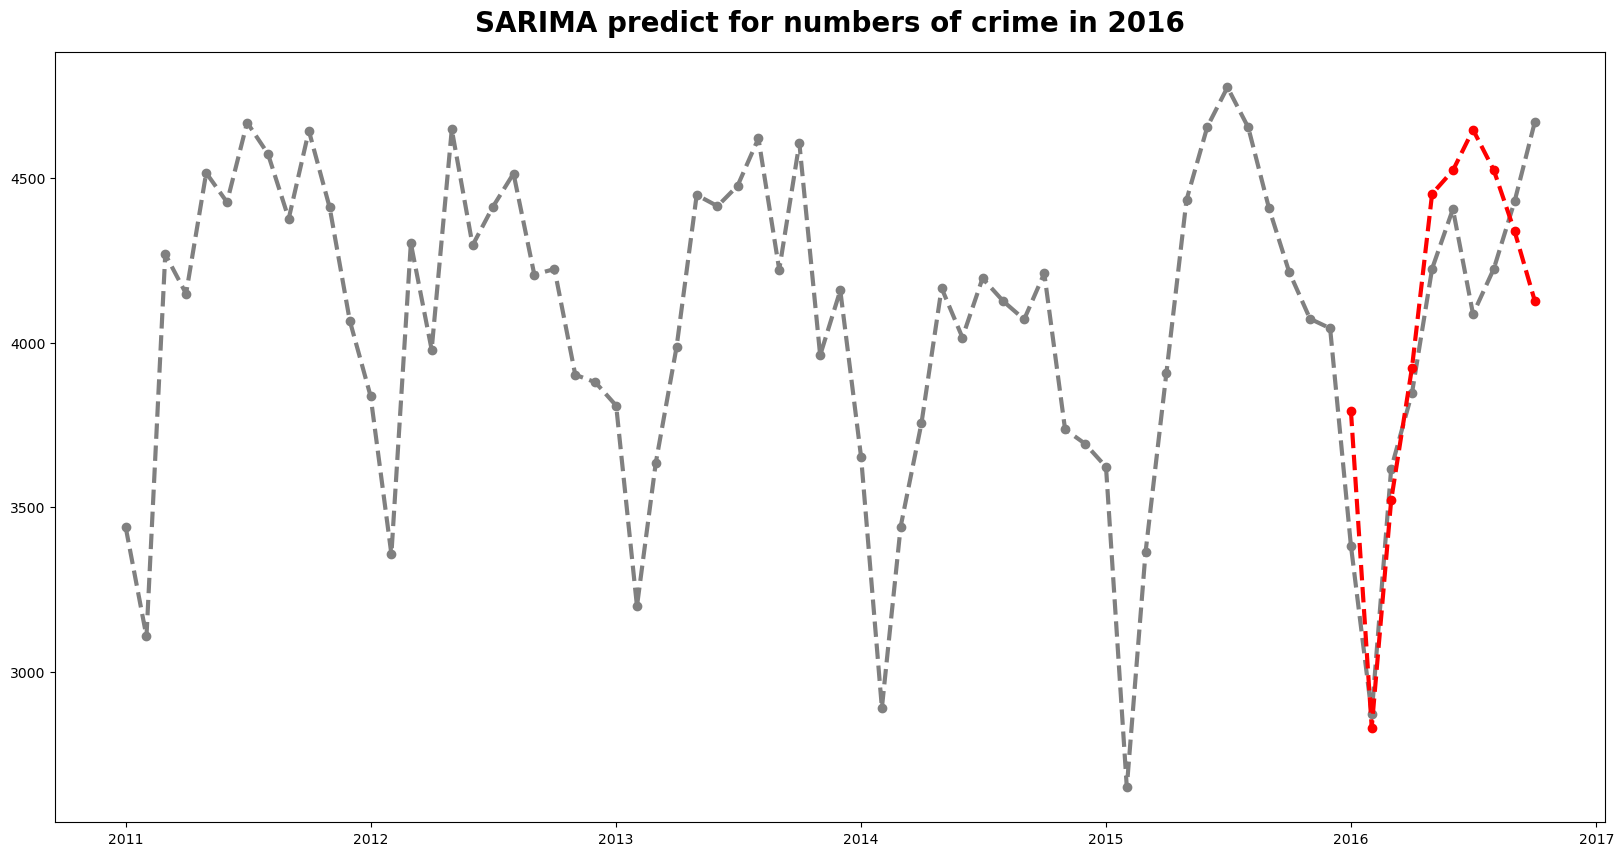

In [62]:
model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(2, 1, 1, 12))
model_fit = model.fit()
# yhat = model_fit.forecast()
yhat = model_fit.predict(start='2016-01-01' , end=crime_count.index[-1])

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(crime_count, linewidth=3, marker='o', linestyle='--', color='grey')
plt.plot(yhat, linewidth=3, marker='o', linestyle='--', color='red')
plt.title('SARIMA predict for numbers of crime in 2016', fontsize=20, fontweight='bold', pad=15)

In [63]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         CrimeCount   No. Observations:                   60
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -320.587
Date:                            Mon, 15 May 2023   AIC                            655.175
Time:                                    23:03:04   BIC                            668.126
Sample:                                01-01-2011   HQIC                           660.048
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5007      0.157      3.199      0.001       0.194       0.807
ar.L2          0.2928      0.270   

#### **Sử dụng auto-arima để tìm ra mô hình tốt nhất cho dữ liệu. Phương pháp này tương tự với GridSearch ở thư viện scikit-learn, ta sẽ tìm kiếm bộ tham số tốt nhất cho mô hình trên không gian tham số.**

- Mô hình có yếu tố mùa vụ => seasonal = True, lúc này mô hình **ARIMA** sẽ trở thành mô hình **SARIMA** (seasonal ARIMA).
- Chu kì của mùa vụ là 12 tháng: m = 12
- Do chuỗi có trend nên ta sẽ lấy sai phân bậc 1 để tạo chuỗi dừng => d = 1

In [64]:
# !pip install pyramid-arima
# !conda install pmdarima

In [65]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           trace=True, d=1, D=1,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=654.038, Time=0.10 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=655.538, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=648.939, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=649.296, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=649.205, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=650.841, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=650.791, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=649.154, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=654.453, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=650.935, Time=0.11 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=650.908, Time=0.15 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=649.100, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AI

In [66]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -321.470
Date:                            Mon, 15 May 2023   AIC                            648.939
Time:                                    23:03:07   BIC                            654.490
Sample:                                01-01-2011   HQIC                           651.028
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3799      0.139     -2.728      0.006      -0.653      -0.107
ar.S.L12      -0.2507      0.188   

=> Kết quả tốt nhất mô hình thu được là **SARIMA(1,1,0)(1,1,0)[12]** (tương ứng với p=1, d=1, q=1, P=1, D=1, Q=1, m=1)
- Các hệ số hồi quy đều có ý nghĩa thống kê khi tất cả các giá trị **P>|z|** đều nhỏ hơn 0.05. 
- Giá trị **AIC** là nhỏ nhất trong các mô hình.

**Dự báo cho tập test**

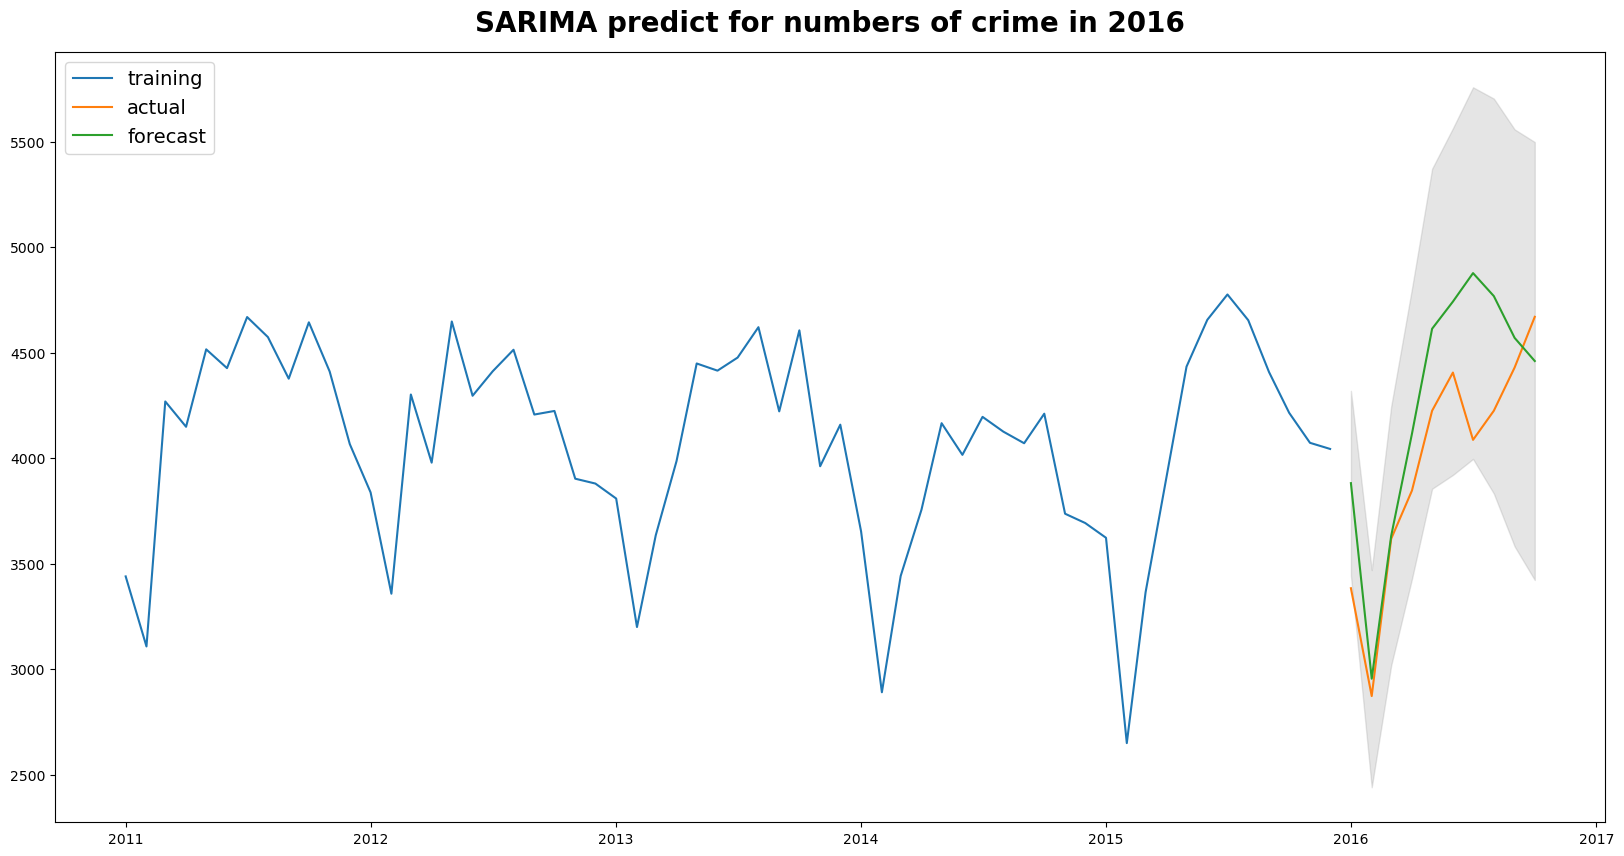

In [67]:
 # n_periods=10 dự báo cho 10 tháng tiếp theo
 # alpha=0.05 để xác định mức tin cậy 95%
fitted, conf = model.predict(n_periods=10, return_conf_int=True, alpha=0.05)
fitted_series = pd.Series(fitted, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(train, label='training')
ax.plot(test, label='actual')
ax.plot(fitted_series, label='forecast')
ax.fill_between(lower_series.index, lower_series, upper_series, 
                 color='grey', alpha=.2)
ax.legend(loc='upper left', fontsize=14)
ax.set_title('SARIMA predict for numbers of crime in 2016', fontsize=20, fontweight='bold', pad=15)
plt.show()

Đánh giá kết quả của mô hình trên tập test dựa vào các metric của hồi quy tuyến tính như: MSE, RMSE, MAE, MAPE.

In [68]:
def evaluate(y, y_hat):
    e = y-y_hat
    mse=np.round(np.mean(e**2), 3)
    rmse=np.round(np.sqrt(mse), 3)
    mae=np.round(np.mean(np.abs(e)), 3)
    mape=np.round(np.mean(e/y), 3)

    print(f'Mean Square Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')
    return mse, rmse, mae, mape

evaluate(test.values, fitted_series.values)

Mean Square Error: 692839.798
Root Mean Square Error: 832.37
Mean Absolute Error: 670.316
Mean Absolute Percentage Error: -0.093


(692839.798, 832.37, 670.316, -0.093)

Nhìn chung các kết quả tương đối tốt, tuy nhiên **mean square error** vẫn khá lớn, có thể do có khá ít dữ liệu, nên mô hình dự báo không thể đem lại kết quả cao. Để cải thiện kết quả, ta nên thu thập thêm dữ liệu cho mô hình. Ngoài ra, do những tháng cuối năm 2016, các vụ phạm tội có xu hướng tăng, khác với chu kì trước, đây có thể là một nguyên nhân khiến mô hình dự báo không tốt ở những tháng này.

<Axes: xlabel='CrimeDate'>

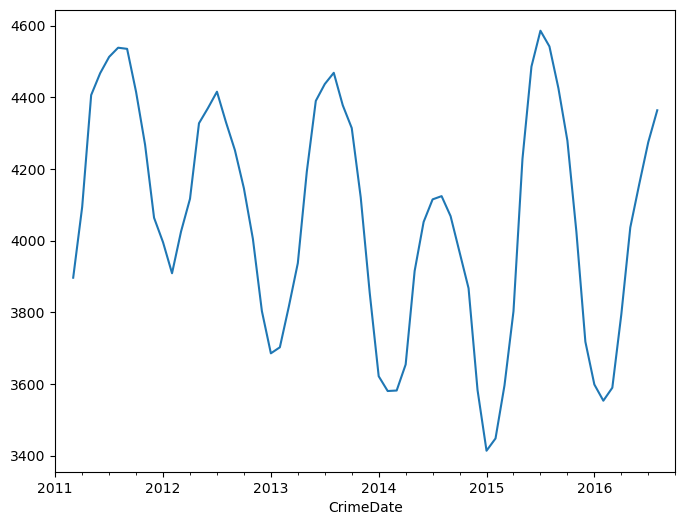

In [69]:
df_ma = crime_count.CrimeCount.rolling(5, center=True).mean()
df_ma.plot()

___

### **Làm trơn dữ liệu**
Vì dữ liệu theo ngày khá nhiễu nên ta sẽ tiến hành làm trơn dữ liệu bằng moving average và lowess smoothers.

In [70]:
plot_df = df.groupby('CrimeDate').agg('size').to_frame().rename(columns={0: 'CrimeCount'})

**Moving average**: lọc trung bình có trọng số

(14867.9, 17224.1)

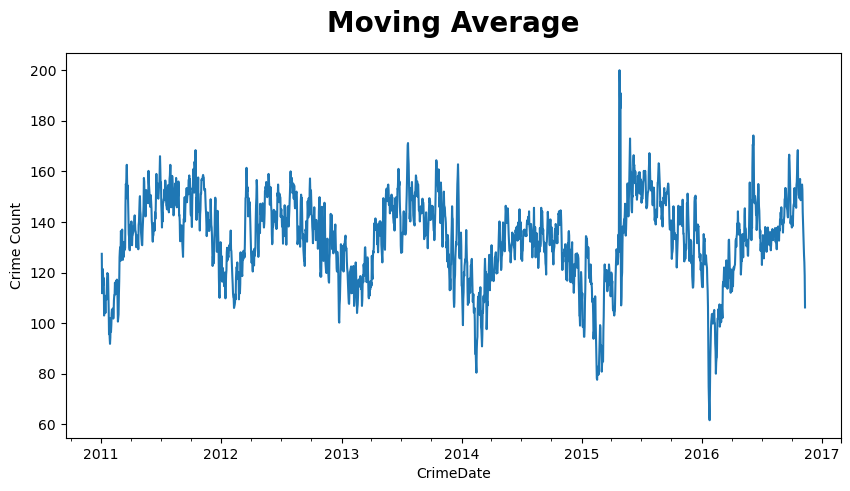

In [71]:
df_ma = plot_df.CrimeCount.rolling(5, center=True).mean()

fig, ax = plt.subplots(figsize=(10,5))
ax = df_ma.plot()
ax.set_title('Moving Average', fontsize=20, fontweight='bold', pad=15)
ax.set_ylabel('Crime Count')
xmin, xmax = ax.get_xlim()
x_range = xmax - xmin
ax.set_xlim(xmin-.05*x_range, xmax+.05*x_range)

**Lowess Smooth**
- Loess sử dụng một cửa sổ trượt (window) để tính toán giá trị xấp xỉ tại mỗi điểm dữ liệu bằng cách lấy trung bình có trọng số của các quan sát trong cửa sổ trượt.
- Thuật toán ước tính $y_i$ bởi frac*N điểm dữ liệu gần nhất, trong đó N là số lượng điểm dữ liệu trong mỗi cửa sổ, và frac là tỷ lệ của N. Các điểm dữ liệu gần nhất được xác định bằng cách tìm các điểm dữ liệu có khoảng cách nhỏ nhất đến $x_i$. Sau đó, tính $y_i$ bằng trung bình có trọng số của các điểm dữ liệu trong window và di chuyển window sang phải và lặp lại các bước tính toán.

Text(0.5, 1.0, 'Loess Smoothing (0.05)')

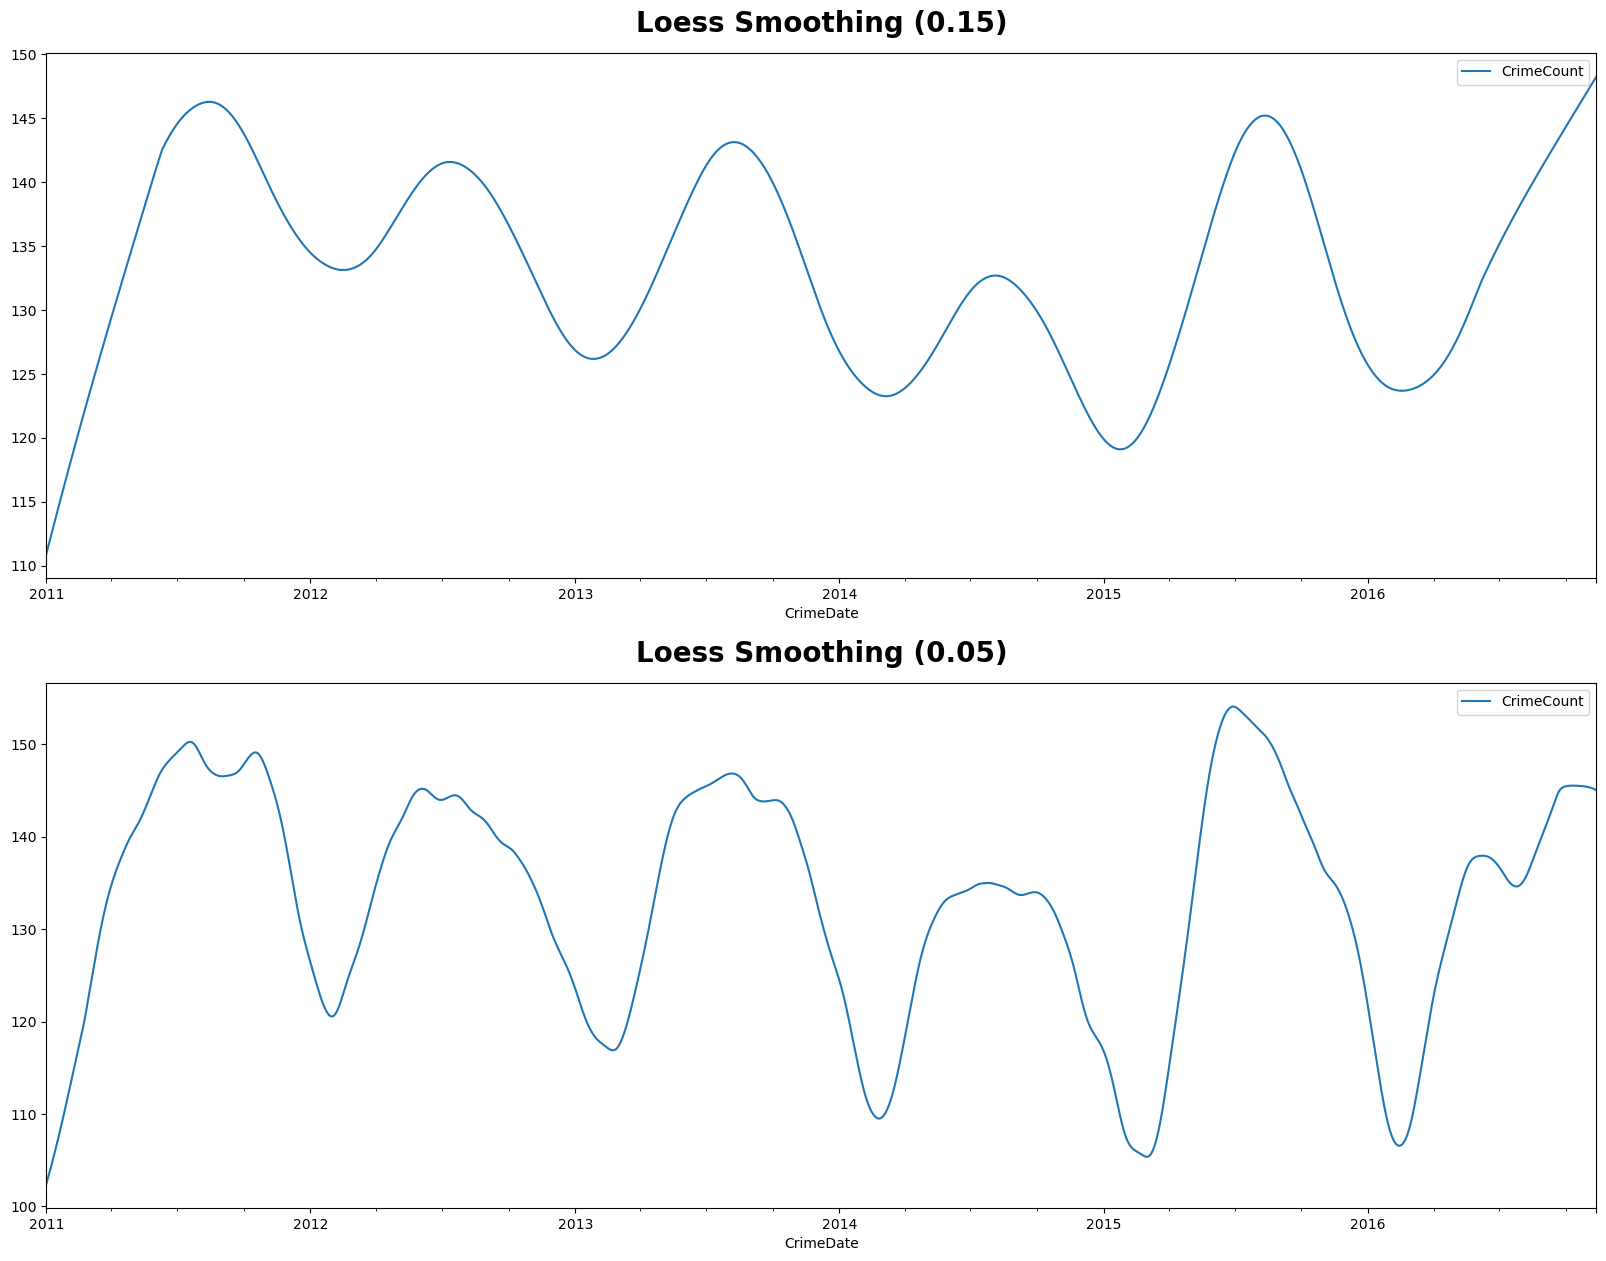

In [72]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, ax = plt.subplots(2, figsize=(20,15))
df_loess_15 = pd.DataFrame(lowess(plot_df.CrimeCount, np.arange(len(plot_df.CrimeCount)), frac=0.15)[:, 1], index=plot_df.index, columns=['CrimeCount'])
df_loess_15.plot(ax=ax[0])
ax[0].set_title('Loess Smoothing (0.15)', fontsize=20, fontweight='bold', pad=15)

df_loess_5 = pd.DataFrame(lowess(plot_df.CrimeCount, np.arange(len(plot_df.CrimeCount)), frac=0.05)[:, 1], index=plot_df.index, columns=['CrimeCount'])
df_loess_5.plot(ax=ax[1])
ax[1].set_title('Loess Smoothing (0.05)', fontsize=20, fontweight='bold', pad=15)


***

*Tài liệu tham khảo:*
- https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html


----
<h1 align=center>THE END</h1>